# Data Preparation





Load data and library

In [ ]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer# For feature scaling
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering

# NEW LIBRARY TO LEARN TODAY
import pickle # menyimpan model kita dalam format pickle nanti (pickle ga cuma untuk dataframe aja, tp semua hal di python include variabel)
from sklearn.linear_model import LogisticRegression # train logistic regression model
from sklearn.model_selection import train_test_split # split training and testing
from sklearn.metrics import classification_report, confusion_matrix # model performance report
from sklearn.metrics import roc_curve, auc, roc_auc_score # melihat performa dari hasil model kita

In [ ]:
# url = "https://drive.google.com/file/d/1yZ4LCxiXWzJ8C-4lHHEyQ9vtRd0DxblC/view"
# output = 'sales_data.csv'
# gdown.download(url, output, quiet=False, fuzzy=True)

In [ ]:
url = "https://drive.google.com/file/d/1yZ4LCxiXWzJ8C-4lHHEyQ9vtRd0DxblC/view"
output = "sales_data.csv"

# Download
url = 'https://drive.google.com/uc?id=' + url.split('/')[5]
!wget --no-check-certificate {url} -O {output}

--2024-03-23 01:41:21--  https://drive.google.com/uc?id=1yZ4LCxiXWzJ8C-4lHHEyQ9vtRd0DxblC
Resolving drive.google.com (drive.google.com)... 209.85.147.100, 209.85.147.101, 209.85.147.113, ...
Connecting to drive.google.com (drive.google.com)|209.85.147.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1yZ4LCxiXWzJ8C-4lHHEyQ9vtRd0DxblC [following]
--2024-03-23 01:41:22--  https://drive.usercontent.google.com/download?id=1yZ4LCxiXWzJ8C-4lHHEyQ9vtRd0DxblC
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.147.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681186 (665K) [application/octet-stream]
Saving to: ‘sales_data.csv’

sales_data.csv      100%[===================>] 665.22K  --.-KB/s    in 0.008s  

2024-03-23 01:41:22 (84.2 MB/s) 

In [ ]:
pd.read_csv("/content/sales_data.csv")

account_id account_activity_level customer_value_level    MOB  \
0       100000006                      X                    A   91.0   
1       100000038                      X                    A   69.0   
2       100000382                      X                    A  123.0   
3       100000612                      X                    A   84.0   
4       100000757                      X                    A   40.0   
...           ...                    ...                  ...    ...   
12482   101059900                      Z                    E   21.0   
12483   101059915                      Z                    E   19.0   
12484   101059935                      Z                    E   21.0   
12485   101059941                      Z                    E   17.0   
12486   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
0                          26                        5  1996-11-03  
1                          25                       10  1971-04-24  
2                          18                        6  1953-01-16  
3                          14                        7  1997-06-07  
4                          17                        5  1989-09-13  
...                       ...                      ...         ...  
12482                      21                        3  1970-05-27  
12483                      19                        4  1952-03-04  
12484                      21                        4  1981-10-23  
12485                      17                        6  1975-07-21  
12486                      21                        5  1975-08-21  

[12487 rows x 11 columns]

In [ ]:
df = pd.read_csv("/content/sales_data.csv")
df.head()

account_id account_activity_level customer_value_level    MOB  flag_female  \
0   100000006                      X                    A   91.0            0   
1   100000038                      X                    A   69.0            0   
2   100000382                      X                    A  123.0            1   
3   100000612                      X                    A   84.0            1   
4   100000757                      X                    A   40.0            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M  birth_date  
0                        5  1996-11-03  
1                       10  1971-04-24  
2                        6  1953-01-16  
3                        7  1997-06-07  
4                        5  1989-09-13

# Check Dataframe for Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12487 non-null  int64  
 1   account_activity_level   12487 non-null  object 
 2   customer_value_level     12487 non-null  object 
 3   MOB                      12487 non-null  float64
 4   flag_female              12487 non-null  int64  
 5   avg_sales_L36M           11751 non-null  float64
 6   cnt_sales_L36M           12487 non-null  int64  
 7   last_sales               12487 non-null  float64
 8   month_since_last_sales   12487 non-null  int64  
 9   count_direct_promo_L12M  12487 non-null  int64  
 10  birth_date               12487 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB




```
BIRTH_DATE data typenya masih string, need to change to datetime
```



## Check Typo and unique value

Take a look at the unique values in each column and find any data that you should exclude from your analysis.

In [ ]:
# Use value_count function to check each categorical column & compare it to the data dictionary
for nama_kolom in df.columns:
  print(nama_kolom)
  print(df[nama_kolom].value_counts())
  print('\n')

account_id
100000006    1
100700791    1
100699591    1
100699624    1
100699637    1
            ..
100343448    1
100343468    1
100343797    1
100343837    1
101060006    1
Name: account_id, Length: 12487, dtype: int64


account_activity_level
X      8186
Z      3426
Y       874
XYZ       1
Name: account_activity_level, dtype: int64


customer_value_level
E    4452
B    2374
A    2196
C    1994
D    1470
F       1
Name: customer_value_level, dtype: int64


MOB
17.0     656
16.0     568
21.0     488
20.0     385
24.0     342
        ... 
283.0      1
151.0      1
232.0      1
143.0      1
154.0      1
Name: MOB, Length: 128, dtype: int64


flag_female
1    6759
0    5728
Name: flag_female, dtype: int64


avg_sales_L36M
25000.0    2043
20000.0    1732
10000.0    1690
15000.0    1422
5000.0      488
           ... 
10360.0       1
13330.0       1
5880.0        1
50000.0       1
18200.0       1
Name: avg_sales_L36M, Length: 277, dtype: int64


cnt_sales_L36M
1     3963
2     2656
3     

There is 'XYZ' in account activity level and 'F' in 'costumer_value_level',
which is typo or wrong data input



## Check missing value

Check for missing values and duplicates. If you find any duplicates, please delete the data. Could you elaborate on why you strongly suggested deleting the data and not replacing it with any other value?

In [ ]:
df.isna().sum()

account_id                   0
account_activity_level       0
customer_value_level         0
MOB                          0
flag_female                  0
avg_sales_L36M             736
cnt_sales_L36M               0
last_sales                   0
month_since_last_sales       0
count_direct_promo_L12M      0
birth_date                   0
dtype: int64

'avg_sales_L36M' column has missing value of **736** entries




In [ ]:
# tampilin data mana aja yg kosong
df[df.isnull().any(axis='columns')]

account_id account_activity_level customer_value_level    MOB  \
23      100002370                      Z                    A  110.0   
26      100002547                      X                    A   61.0   
37      100003731                      X                    A   54.0   
59      100005474                      Z                    A   56.0   
86      100008094                      X                    B  127.0   
...           ...                    ...                  ...    ...   
12420   101054957                      Z                    E   51.0   
12429   101055421                      X                    E   54.0   
12432   101055837                      Z                    E   51.0   
12449   101057435                      X                    E  123.0   
12461   101058331                      Z                    E   55.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
23               0             NaN               0     15000.0   
26               0             NaN               0     15000.0   
37               1             NaN               0     15000.0   
59               0             NaN               0     15000.0   
86               1             NaN               0     15000.0   
...            ...             ...             ...         ...   
12420            1             NaN               0     15000.0   
12429            0             NaN               0     15000.0   
12432            0             NaN               0     15000.0   
12449            0             NaN               0     15000.0   
12461            1             NaN               0     15000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
23                         56                        3  1972-08-18  
26                         61                        3  1987-07-24  
37                         54                        6  1954-03-30  
59                         56                        2  1971-04-11  
86                         53                        3  1983-07-12  
...                       ...                      ...         ...  
12420                      51                        3  1993-01-22  
12429                      52                        5  1949-04-26  
12432                      51                        3  1990-08-30  
12449                      53                        5  1957-05-23  
12461                      55                        2  1949-03-26  

[736 rows x 11 columns]

In [ ]:
#alt for checking
df[df.isna().any(axis=1)]

account_id account_activity_level customer_value_level    MOB  \
23      100002370                      Z                    A  110.0   
26      100002547                      X                    A   61.0   
37      100003731                      X                    A   54.0   
59      100005474                      Z                    A   56.0   
86      100008094                      X                    B  127.0   
...           ...                    ...                  ...    ...   
12420   101054957                      Z                    E   51.0   
12429   101055421                      X                    E   54.0   
12432   101055837                      Z                    E   51.0   
12449   101057435                      X                    E  123.0   
12461   101058331                      Z                    E   55.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
23               0             NaN               0     15000.0   
26               0             NaN               0     15000.0   
37               1             NaN               0     15000.0   
59               0             NaN               0     15000.0   
86               1             NaN               0     15000.0   
...            ...             ...             ...         ...   
12420            1             NaN               0     15000.0   
12429            0             NaN               0     15000.0   
12432            0             NaN               0     15000.0   
12449            0             NaN               0     15000.0   
12461            1             NaN               0     15000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
23                         56                        3  1972-08-18  
26                         61                        3  1987-07-24  
37                         54                        6  1954-03-30  
59                         56                        2  1971-04-11  
86                         53                        3  1983-07-12  
...                       ...                      ...         ...  
12420                      51                        3  1993-01-22  
12429                      52                        5  1949-04-26  
12432                      51                        3  1990-08-30  
12449                      53                        5  1957-05-23  
12461                      55                        2  1949-03-26  

[736 rows x 11 columns]

In [ ]:
df[df['avg_sales_L36M'].isna()]

account_id account_activity_level customer_value_level    MOB  \
23      100002370                      Z                    A  110.0   
26      100002547                      X                    A   61.0   
37      100003731                      X                    A   54.0   
59      100005474                      Z                    A   56.0   
86      100008094                      X                    B  127.0   
...           ...                    ...                  ...    ...   
12420   101054957                      Z                    E   51.0   
12429   101055421                      X                    E   54.0   
12432   101055837                      Z                    E   51.0   
12449   101057435                      X                    E  123.0   
12461   101058331                      Z                    E   55.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
23               0             NaN               0     15000.0   
26               0             NaN               0     15000.0   
37               1             NaN               0     15000.0   
59               0             NaN               0     15000.0   
86               1             NaN               0     15000.0   
...            ...             ...             ...         ...   
12420            1             NaN               0     15000.0   
12429            0             NaN               0     15000.0   
12432            0             NaN               0     15000.0   
12449            0             NaN               0     15000.0   
12461            1             NaN               0     15000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
23                         56                        3  1972-08-18  
26                         61                        3  1987-07-24  
37                         54                        6  1954-03-30  
59                         56                        2  1971-04-11  
86                         53                        3  1983-07-12  
...                       ...                      ...         ...  
12420                      51                        3  1993-01-22  
12429                      52                        5  1949-04-26  
12432                      51                        3  1990-08-30  
12449                      53                        5  1957-05-23  
12461                      55                        2  1949-03-26  

[736 rows x 11 columns]

In [ ]:
df['avg_sales_L36M'].value_counts()

25000.0    2043
20000.0    1732
10000.0    1690
15000.0    1422
5000.0      488
           ... 
10360.0       1
13330.0       1
5880.0        1
50000.0       1
18200.0       1
Name: avg_sales_L36M, Length: 277, dtype: int64

In [ ]:
df['avg_sales_L36M'].min()

-1000.0

In [ ]:
df[df['avg_sales_L36M'] < 0]

account_id account_activity_level customer_value_level   MOB  \
10912   100925419                      X                    A  54.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
10912            1         -1000.0               1     14000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
10912                       9                        5  1955-07-14

There is avg_sales_L36M that has an entry of -1000



## Cek Duplicate

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12482    False
12483    False
12484    False
12485    False
12486    False
Length: 12487, dtype: bool

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [account_id, account_activity_level, customer_value_level, MOB, flag_female, avg_sales_L36M, cnt_sales_L36M, last_sales, month_since_last_sales, count_direct_promo_L12M, birth_date]
Index: []

No Duplicates

| Temuan | Plan of Action |
|---|---|
| `birth_date` data typenya masih string | Ganti ke data type datetime |
| `account_activity_level` ada data **XYZ** | drop XYZ |
| `customer_value_level` ada entry F, padahal cuman dari A-E | Drop F |
| tidak ada data yang duplikat |  |
| `account_id` datatype masi int | Ubah jadi *object* |
| avg_sales_L36M has 1 entry of -1000 | drop -1000  |
| ada null value of 'avg_sales_L36M' | isi value with 0 since cnt_sales is 0 |


# Actual Data Cleaning

Check the data types of each column and convert them to the correct types.
*   Any identifier (e.g. client ID, account ID) should be converted to string
*   All count data should be converted to integer
*   All data related to money should be in float typeList item
*   All datetime/timeseries data should be time series type (not string).
  ---> birthdate still string need to change to **datatime**





Based on the client’s birth date, calculate the age of each client as of January 31, 2023. For this analysis, remove any client with age less than 21.  

In [ ]:
# Copy Dataframe
df2 = df.copy()

## Change Datetime Format

In [ ]:
# ubah jadi date time
df2['birth_date'] = pd.to_datetime(df2['birth_date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12487 non-null  int64         
 1   account_activity_level   12487 non-null  object        
 2   customer_value_level     12487 non-null  object        
 3   MOB                      12487 non-null  float64       
 4   flag_female              12487 non-null  int64         
 5   avg_sales_L36M           11751 non-null  float64       
 6   cnt_sales_L36M           12487 non-null  int64         
 7   last_sales               12487 non-null  float64       
 8   month_since_last_sales   12487 non-null  int64         
 9   count_direct_promo_L12M  12487 non-null  int64         
 10  birth_date               12487 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 1.0+ MB


In [ ]:
# Menghitung UMUR
df2['client_age']  = (datetime(year=2023, month=1, day=31) - df2['birth_date']) // np.timedelta64(1,'Y')
df2

account_id account_activity_level customer_value_level    MOB  \
0       100000006                      X                    A   91.0   
1       100000038                      X                    A   69.0   
2       100000382                      X                    A  123.0   
3       100000612                      X                    A   84.0   
4       100000757                      X                    A   40.0   
...           ...                    ...                  ...    ...   
12482   101059900                      Z                    E   21.0   
12483   101059915                      Z                    E   19.0   
12484   101059935                      Z                    E   21.0   
12485   101059941                      Z                    E   17.0   
12486   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          51  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12482                      21                        3 1970-05-27          52  
12483                      19                        4 1952-03-04          70  
12484                      21                        4 1981-10-23          41  
12485                      17                        6 1975-07-21          47  
12486                      21                        5 1975-08-21          47  

[12487 rows x 12 columns]

## Fill missing value with 0

Di avg_sales_L36 ada 736 missing value dari 12487, jadi ada 5%. Setelah dilihat, ternyata count salesnya 0. Jadi tidak ada pembelian jadi kita bisa impute wih 0

In [ ]:
df2['avg_sales_L36M'] = df2['avg_sales_L36M'].fillna(0)
df2

account_id account_activity_level customer_value_level    MOB  \
0       100000006                      X                    A   91.0   
1       100000038                      X                    A   69.0   
2       100000382                      X                    A  123.0   
3       100000612                      X                    A   84.0   
4       100000757                      X                    A   40.0   
...           ...                    ...                  ...    ...   
12482   101059900                      Z                    E   21.0   
12483   101059915                      Z                    E   19.0   
12484   101059935                      Z                    E   21.0   
12485   101059941                      Z                    E   17.0   
12486   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          51  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12482                      21                        3 1970-05-27          52  
12483                      19                        4 1952-03-04          70  
12484                      21                        4 1981-10-23          41  
12485                      17                        6 1975-07-21          47  
12486                      21                        5 1975-08-21          47  

[12487 rows x 12 columns]

In [ ]:
df2.isnull().sum()

account_id                 0
account_activity_level     0
customer_value_level       0
MOB                        0
flag_female                0
avg_sales_L36M             0
cnt_sales_L36M             0
last_sales                 0
month_since_last_sales     0
count_direct_promo_L12M    0
birth_date                 0
client_age                 0
dtype: int64

Null udah abis

## Change datatype account_id to object from int

In [ ]:
df3 = df2.copy()
df3

account_id account_activity_level customer_value_level    MOB  \
0       100000006                      X                    A   91.0   
1       100000038                      X                    A   69.0   
2       100000382                      X                    A  123.0   
3       100000612                      X                    A   84.0   
4       100000757                      X                    A   40.0   
...           ...                    ...                  ...    ...   
12482   101059900                      Z                    E   21.0   
12483   101059915                      Z                    E   19.0   
12484   101059935                      Z                    E   21.0   
12485   101059941                      Z                    E   17.0   
12486   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          51  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12482                      21                        3 1970-05-27          52  
12483                      19                        4 1952-03-04          70  
12484                      21                        4 1981-10-23          41  
12485                      17                        6 1975-07-21          47  
12486                      21                        5 1975-08-21          47  

[12487 rows x 12 columns]

In [ ]:
df3[['account_id']] = df3[['account_id']].astype(str)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12487 non-null  object        
 1   account_activity_level   12487 non-null  object        
 2   customer_value_level     12487 non-null  object        
 3   MOB                      12487 non-null  float64       
 4   flag_female              12487 non-null  int64         
 5   avg_sales_L36M           12487 non-null  float64       
 6   cnt_sales_L36M           12487 non-null  int64         
 7   last_sales               12487 non-null  float64       
 8   month_since_last_sales   12487 non-null  int64         
 9   count_direct_promo_L12M  12487 non-null  int64         
 10  birth_date               12487 non-null  datetime64[ns]
 11  client_age               12487 non-null  int64         
dtypes: datetime64[ns](1), float64(3)

## Exclude F from **customer_value_level**

kita drop F dan XYZ dari customer_value_level dan account_activity_level

In [ ]:
df3['customer_value_level'].value_counts()

E    4452
B    2374
A    2196
C    1994
D    1470
F       1
Name: customer_value_level, dtype: int64

In [ ]:
df3[df3['customer_value_level'].str.contains('F')]

account_id account_activity_level customer_value_level    MOB  \
1380  100112619                      Y                    F  122.0   

      flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
1380            1         10000.0               1     10000.0   

      month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
1380                      24                        4 1997-12-29          25

In [ ]:
# Drop F
df3[~df3['customer_value_level'].str.contains('F')]

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          51  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12482                      21                        3 1970-05-27          52  
12483                      19                        4 1952-03-04          70  
12484                      21                        4 1981-10-23          41  
12485                      17                        6 1975-07-21          47  
12486                      21                        5 1975-08-21          47  

[12486 rows x 12 columns]

In [ ]:
# replace the dataframe
df3 = df3[~df3['customer_value_level'].str.contains('F')]
df3['customer_value_level'].value_counts()

E    4452
B    2374
A    2196
C    1994
D    1470
Name: customer_value_level, dtype: int64

In [ ]:
# check again for the column customer_value_level
df3[df3['customer_value_level'].str.contains('F')]

Empty DataFrame
Columns: [account_id, account_activity_level, customer_value_level, MOB, flag_female, avg_sales_L36M, cnt_sales_L36M, last_sales, month_since_last_sales, count_direct_promo_L12M, birth_date, client_age]
Index: []

No F found

## Drop XYZ from and **account_activity_level**

In [ ]:
#DROP XYZ
df3['account_activity_level'].value_counts()

X      8186
Z      3426
Y       873
XYZ       1
Name: account_activity_level, dtype: int64

In [ ]:
df3.loc[df3['account_activity_level'] == "XYZ"]

account_id account_activity_level customer_value_level   MOB  flag_female  \
549  100045310                    XYZ                    D  53.0            1   

     avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
549             0.0               0     16000.0                      53   

     count_direct_promo_L12M birth_date  client_age  
549                        5 1974-03-06          48

In [ ]:
df3 = df3[df3['account_activity_level'] != "XYZ"]
df3

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          51  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12482                      21                        3 1970-05-27          52  
12483                      19                        4 1952-03-04          70  
12484                      21                        4 1981-10-23          41  
12485                      17                        6 1975-07-21          47  
12486                      21                        5 1975-08-21          47  

[12485 rows x 12 columns]

In [ ]:
df3['account_activity_level'].value_counts()

X    8186
Z    3426
Y     873
Name: account_activity_level, dtype: int64

We now exclude XYZ so it's not within the dataset

## Drop -1000 from avg_sales_L36M

In [ ]:
#copy df
df4 = df3.copy()

In [ ]:
# check row for avg_sales_L36M
df4[df4['avg_sales_L36M'] < 0]

account_id account_activity_level customer_value_level   MOB  \
10912  100925419                      X                    A  54.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
10912            1         -1000.0               1     14000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
10912                       9                        5 1955-07-14          67

In [ ]:
# exclude the data
df4 = df4[df4['avg_sales_L36M'] >= 0]
df4

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          51  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12482                      21                        3 1970-05-27          52  
12483                      19                        4 1952-03-04          70  
12484                      21                        4 1981-10-23          41  
12485                      17                        6 1975-07-21          47  
12486                      21                        5 1975-08-21          47  

[12484 rows x 12 columns]

In [ ]:
# check again
df4[df4['avg_sales_L36M'] < 0]

Empty DataFrame
Columns: [account_id, account_activity_level, customer_value_level, MOB, flag_female, avg_sales_L36M, cnt_sales_L36M, last_sales, month_since_last_sales, count_direct_promo_L12M, birth_date, client_age]
Index: []

Data is clean now

## Filter age < 21

In [ ]:
# Calculate the age using the time difference technique covered in Day 3.
# Use the .loc method to exclude any client with an age less than 21

In [ ]:
# check filter for age > 21
df4[df4['client_age'] < 21]

account_id account_activity_level customer_value_level    MOB  \
56     100005335                      Z                    A   21.0   
155    100014578                      Z                    E   18.0   
345    100029092                      X                    C  123.0   
474    100038815                      X                    A   69.0   
477    100038963                      X                    A  129.0   
...          ...                    ...                  ...    ...   
11949  101014936                      Z                    B   25.0   
12071  101024325                      X                    A  120.0   
12096  101026926                      X                    E  128.0   
12109  101028507                      Z                    E   55.0   
12257  101040553                      X                    C  126.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
56               1         15000.0               1     15000.0   
155              1         25000.0               1     25000.0   
345              1         10000.0               1     10000.0   
474              0          5750.0               4      5000.0   
477              1         25000.0               2     25000.0   
...            ...             ...             ...         ...   
11949            1         25000.0               2     25000.0   
12071            1          9330.0               4     10000.0   
12096            1         10000.0               3     10000.0   
12109            0             0.0               0     15000.0   
12257            0         10000.0               2     10000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
56                         21                        3 2004-06-12          18  
155                        18                        5 2006-07-27          16  
345                        19                        3 2006-12-14          16  
474                        18                        6 2006-07-12          16  
477                        18                        6 2005-11-25          17  
...                       ...                      ...        ...         ...  
11949                      25                        5 2004-08-27          18  
12071                      24                        6 2005-02-11          17  
12096                      16                        5 2005-12-06          17  
12109                      55                        3 2005-02-03          17  
12257                      17                        5 2007-02-28          15  

[132 rows x 12 columns]

There are 148 users who are below age 21

In [ ]:
# check filter for age > 21
df4[df4['client_age'] >= 21]

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          51  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12482                      21                        3 1970-05-27          52  
12483                      19                        4 1952-03-04          70  
12484                      21                        4 1981-10-23          41  
12485                      17                        6 1975-07-21          47  
12486                      21                        5 1975-08-21          47  

[12352 rows x 12 columns]

In [ ]:
# filter age and put to dataframe
df4 = df4[df4['client_age'] >= 21]
df4

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          51  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12482                      21                        3 1970-05-27          52  
12483                      19                        4 1952-03-04          70  
12484                      21                        4 1981-10-23          41  
12485                      17                        6 1975-07-21          47  
12486                      21                        5 1975-08-21          47  

[12352 rows x 12 columns]

In [ ]:
# Untuk setiap "column_name" di nama2 kolom data "account", spesifik di data yang tipenya "object" pakai .select_dtypes()
for column_name in df4.select_dtypes("object").columns:
  print(column_name)
  print(df4[column_name].value_counts())
  print('\n')

account_id
100000006    1
100696929    1
100699141    1
100699279    1
100699291    1
            ..
100342907    1
100342921    1
100342946    1
100342958    1
101060006    1
Name: account_id, Length: 12352, dtype: int64


account_activity_level
X    8088
Z    3395
Y     869
Name: account_activity_level, dtype: int64


customer_value_level
E    4407
B    2352
A    2163
C    1974
D    1456
Name: customer_value_level, dtype: int64




## Add column gender from flag_female

In [ ]:
# add new column 'gender' from 'flag_female'
df4['gender'] = np.where(df4['flag_female'] == 1, 'Female', 'Male')
df4

<ipython-input-42-880f19c4929b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['gender'] = np.where(df4['flag_female'] == 1, 'Female', 'Male')


account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
0                          26                        5 1996-11-03          26   
1                          25                       10 1971-04-24          51   
2                          18                        6 1953-01-16          70   
3                          14                        7 1997-06-07          25   
4                          17                        5 1989-09-13          33   
...                       ...                      ...        ...         ...   
12482                      21                        3 1970-05-27          52   
12483                      19                        4 1952-03-04          70   
12484                      21                        4 1981-10-23          41   
12485                      17                        6 1975-07-21          47   
12486                      21                        5 1975-08-21          47   

       gender  
0        Male  
1        Male  
2      Female  
3      Female  
4        Male  
...       ...  
12482  Female  
12483    Male  
12484    Male  
12485    Male  
12486  Female  

[12352 rows x 13 columns]

# Descriptive Statistics



In [ ]:
# make a copy of clean df
df_clean = df4.copy()

In [ ]:
df_clean.head(10)

account_id account_activity_level customer_value_level    MOB  flag_female  \
0  100000006                      X                    A   91.0            0   
1  100000038                      X                    A   69.0            0   
2  100000382                      X                    A  123.0            1   
3  100000612                      X                    A   84.0            1   
4  100000757                      X                    A   40.0            0   
5  100000932                      X                    A   45.0            1   
6  100000996                      X                    A  105.0            1   
7  100001201                      X                    A   41.0            0   
8  100001304                      X                    A  126.0            1   
9  100001339                      X                    A   70.0            1   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   
5          9000.0               4     10000.0                      18   
6         10000.0               5     10000.0                      19   
7         25000.0               2     25000.0                      24   
8         17500.0               2     20000.0                      17   
9          9800.0               4     10000.0                      18   

   count_direct_promo_L12M birth_date  client_age  gender  
0                        5 1996-11-03          26    Male  
1                       10 1971-04-24          51    Male  
2                        6 1953-01-16          70  Female  
3                        7 1997-06-07          25  Female  
4                        5 1989-09-13          33    Male  
5                        6 1971-11-05          51  Female  
6                        6 1975-01-06          48  Female  
7                        3 1973-09-04          49    Male  
8                        6 1947-03-02          75  Female  
9                        3 1951-06-14          71  Female

## Descriptive info about numbers


In [ ]:
numeric = ['MOB','avg_sales_L36M','cnt_sales_L36M','last_sales','month_since_last_sales','count_direct_promo_L12M','client_age']

desc_eda = df_clean[numeric].describe()
desc_eda.loc['kurtosis'] = df_clean[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_clean[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_clean[numeric].var() #show variance statistic
desc_eda.round(2)

MOB  avg_sales_L36M  cnt_sales_L36M   last_sales  \
count     12352.00        12352.00        12352.00     12352.00   
mean         63.81        14246.77            2.65     15578.82   
std          40.24         7570.86            2.09      6695.19   
min          15.00            0.00            0.00         0.00   
25%          24.00         9170.00            1.00     10000.00   
50%          55.00        15000.00            2.00     15000.00   
75%         102.00        20000.00            4.00     20000.00   
max         571.00       200000.00           15.00    200000.00   
kurtosis      0.78           29.79            2.07        47.70   
skewness      0.54            1.29            1.35         1.93   
variance   1619.43     57317908.33            4.37  44825554.05   

          month_since_last_sales  count_direct_promo_L12M  client_age  
count                   12352.00                 12352.00    12352.00  
mean                       20.75                     5.10       58.53  
std                         9.24                     1.34       16.16  
min                         3.00                     0.00       21.00  
25%                        17.00                     4.00       46.00  
50%                        18.00                     5.00       59.00  
75%                        21.00                     6.00       72.00  
max                        63.00                    16.00       88.00  
kurtosis                    8.86                     2.16       -1.00  
skewness                    2.91                     0.22       -0.17  
variance                   85.41                     1.81      261.10

### **Insight:**
* Of all 12,336 users, **average sales for last 3 years** are 14,249 eur, the median is 15,000 eur, minimum is 0 eur. Variance showing
* Average **client age** is 58 years old, minimum age is 21 years old and the oldest age is 88 years old.
* On average people has **transaction count** of **2.65**, which means for past 3 years, people regularly has transaction around 2-3 times. Maximum is 15 transactions for past 3 years.
* Over past 3 years, users have received of total number of 5 promotions on average.

## Descriptive info about string/object

In [ ]:
objects = ['account_id', 'account_activity_level', 'customer_value_level', 'gender',]
df_clean[objects].describe()

account_id account_activity_level customer_value_level  gender
count       12352                  12352                12352   12352
unique      12352                      3                    5       2
top     100000006                      X                    E  Female
freq            1                   8088                 4407    6674

### **Insight:**
* we have 12336 **user**, which all of them are unique
* **X** is the largest account activity level, total of 8079 users
* However, most of the **customer value level** are in **E** category with total of 4401 users
* **Female** is dominating the gender of user base: 6663

## Descriptive info about datetime type

In [ ]:
df_clean['birth_date'].describe()

<ipython-input-47-654859774818>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clean['birth_date'].describe()


count                   12352
unique                   9314
top       1951-03-10 00:00:00
freq                        6
first     1934-09-21 00:00:00
last      2001-11-20 00:00:00
Name: birth_date, dtype: object

### Insight:
* The birth date ranging from 1934-09-21 to 2001-01-08

## Calculate Total Sales 3 years

Calculate the total sales in the last 3 years.

In [ ]:
# Calculate total sales for each account by multiplying average sales and sales count in the past 3 years.

df_clean['total_sales'] = df_clean['avg_sales_L36M'] * df_clean['cnt_sales_L36M']
df_clean.head(10)

account_id account_activity_level customer_value_level    MOB  flag_female  \
0  100000006                      X                    A   91.0            0   
1  100000038                      X                    A   69.0            0   
2  100000382                      X                    A  123.0            1   
3  100000612                      X                    A   84.0            1   
4  100000757                      X                    A   40.0            0   
5  100000932                      X                    A   45.0            1   
6  100000996                      X                    A  105.0            1   
7  100001201                      X                    A   41.0            0   
8  100001304                      X                    A  126.0            1   
9  100001339                      X                    A   70.0            1   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   
5          9000.0               4     10000.0                      18   
6         10000.0               5     10000.0                      19   
7         25000.0               2     25000.0                      24   
8         17500.0               2     20000.0                      17   
9          9800.0               4     10000.0                      18   

   count_direct_promo_L12M birth_date  client_age  gender  total_sales  
0                        5 1996-11-03          26    Male      25000.0  
1                       10 1971-04-24          51    Male      45000.0  
2                        6 1953-01-16          70  Female     103980.0  
3                        7 1997-06-07          25  Female     154980.0  
4                        5 1989-09-13          33    Male      75000.0  
5                        6 1971-11-05          51  Female      36000.0  
6                        6 1975-01-06          48  Female      50000.0  
7                        3 1973-09-04          49    Male      50000.0  
8                        6 1947-03-02          75  Female      35000.0  
9                        3 1951-06-14          71  Female      39200.0

In [ ]:
df_clean['total_sales'].count()

12352

In [ ]:
# Sum all total sales using .sum() and format the output with commas
total_sales_sum = "{:,.2f}".format(df_clean['total_sales'].sum())
"Total sales in last 3 years: " + total_sales_sum

'Total sales in last 3 years: 402,496,520.00'

## Identify No Sales Percentage


Identify the number of clients with no sales in the past 36 months. What percentage does this represent compared to the total number of clients?


In [ ]:
# Use .loc to filter clients with total sales = 0. Then use .info() or other functions to calculate the number of such clients.
df_clean.loc[df_clean['total_sales'] == 0]

account_id account_activity_level customer_value_level    MOB  \
23     100002370                      Z                    A  110.0   
26     100002547                      X                    A   61.0   
37     100003731                      X                    A   54.0   
59     100005474                      Z                    A   56.0   
86     100008094                      X                    B  127.0   
...          ...                    ...                  ...    ...   
12420  101054957                      Z                    E   51.0   
12429  101055421                      X                    E   54.0   
12432  101055837                      Z                    E   51.0   
12449  101057435                      X                    E  123.0   
12461  101058331                      Z                    E   55.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
23               0             0.0               0     15000.0   
26               0             0.0               0     15000.0   
37               1             0.0               0     15000.0   
59               0             0.0               0     15000.0   
86               1             0.0               0     15000.0   
...            ...             ...             ...         ...   
12420            1             0.0               0     15000.0   
12429            0             0.0               0     15000.0   
12432            0             0.0               0     15000.0   
12449            0             0.0               0     15000.0   
12461            1             0.0               0     15000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
23                         56                        3 1972-08-18          50   
26                         61                        3 1987-07-24          35   
37                         54                        6 1954-03-30          68   
59                         56                        2 1971-04-11          51   
86                         53                        3 1983-07-12          39   
...                       ...                      ...        ...         ...   
12420                      51                        3 1993-01-22          30   
12429                      52                        5 1949-04-26          73   
12432                      51                        3 1990-08-30          32   
12449                      53                        5 1957-05-23          65   
12461                      55                        2 1949-03-26          73   

       gender  total_sales  
23       Male          0.0  
26       Male          0.0  
37     Female          0.0  
59       Male          0.0  
86     Female          0.0  
...       ...          ...  
12420  Female          0.0  
12429    Male          0.0  
12432    Male          0.0  
12449    Male          0.0  
12461  Female          0.0  

[750 rows x 14 columns]

In [ ]:
zero_sales = df_clean.loc[df_clean['total_sales'] == 0]
zero_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 23 to 12461
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               750 non-null    object        
 1   account_activity_level   750 non-null    object        
 2   customer_value_level     750 non-null    object        
 3   MOB                      750 non-null    float64       
 4   flag_female              750 non-null    int64         
 5   avg_sales_L36M           750 non-null    float64       
 6   cnt_sales_L36M           750 non-null    int64         
 7   last_sales               750 non-null    float64       
 8   month_since_last_sales   750 non-null    int64         
 9   count_direct_promo_L12M  750 non-null    int64         
 10  birth_date               750 non-null    datetime64[ns]
 11  client_age               750 non-null    int64         
 12  gender                   750 non-

In [ ]:
num_zero_sales = len(zero_sales)
num_zero_sales

750

There are **748 accounts** that have 0 sales over 3 years

In [ ]:
# Use a pie chart to visualize your result. need to have data for have sales first
df_clean.loc[df_clean['total_sales'] > 0]

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
0                          26                        5 1996-11-03          26   
1                          25                       10 1971-04-24          51   
2                          18                        6 1953-01-16          70   
3                          14                        7 1997-06-07          25   
4                          17                        5 1989-09-13          33   
...                       ...                      ...        ...         ...   
12482                      21                        3 1970-05-27          52   
12483                      19                        4 1952-03-04          70   
12484                      21                        4 1981-10-23          41   
12485                      17                        6 1975-07-21          47   
12486                      21                        5 1975-08-21          47   

       gender  total_sales  
0        Male      25000.0  
1        Male      45000.0  
2      Female     103980.0  
3      Female     154980.0  
4        Male      75000.0  
...       ...          ...  
12482  Female      15000.0  
12483    Male      20000.0  
12484    Male      20000.0  
12485    Male      40000.0  
12486  Female      40000.0  

[11602 rows x 14 columns]

In [ ]:
# put in variable
has_sales = df_clean.loc[df_clean['total_sales'] > 0]
has_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11602 entries, 0 to 12486
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               11602 non-null  object        
 1   account_activity_level   11602 non-null  object        
 2   customer_value_level     11602 non-null  object        
 3   MOB                      11602 non-null  float64       
 4   flag_female              11602 non-null  int64         
 5   avg_sales_L36M           11602 non-null  float64       
 6   cnt_sales_L36M           11602 non-null  int64         
 7   last_sales               11602 non-null  float64       
 8   month_since_last_sales   11602 non-null  int64         
 9   count_direct_promo_L12M  11602 non-null  int64         
 10  birth_date               11602 non-null  datetime64[ns]
 11  client_age               11602 non-null  int64         
 12  gender                   11602 n

In [ ]:
num_has_sales = has_sales['total_sales'].count()
num_has_sales

11602

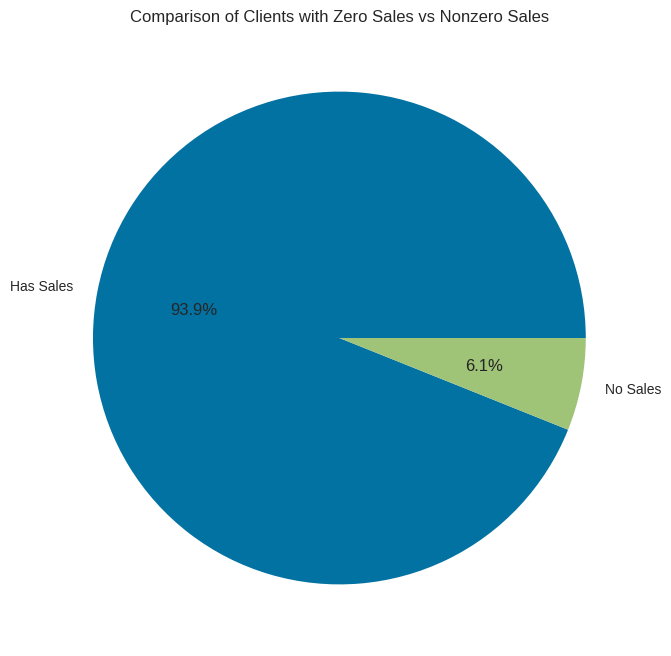

In [ ]:
# now put in a pie chart
plt.figure(figsize=(12,8))
plt.pie((num_has_sales,num_zero_sales),labels=('Has Sales','No Sales'), autopct='%1.1f%%')
plt.title('Comparison of Clients with Zero Sales vs Nonzero Sales')
plt.show()

There is **6.1% data** of client that has no sales out of 12337 entries



## Compare age with MOB

I want to check average MOB for each age

In [ ]:
df_clean.groupby('client_age').mean()[['MOB']].reset_index()

<ipython-input-58-31a33a9e3b4e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('client_age').mean()[['MOB']].reset_index()


client_age        MOB
0           21  50.250000
1           22  49.111111
2           23  33.466667
3           24  44.200000
4           25  41.070175
..         ...        ...
63          84  91.177966
64          85  91.310345
65          86  97.037313
66          87  96.101449
67          88  84.235294

[68 rows x 2 columns]

<ipython-input-59-1482c43f9ac3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_mob = df_clean.groupby(['client_age']).mean()[['MOB']].reset_index()


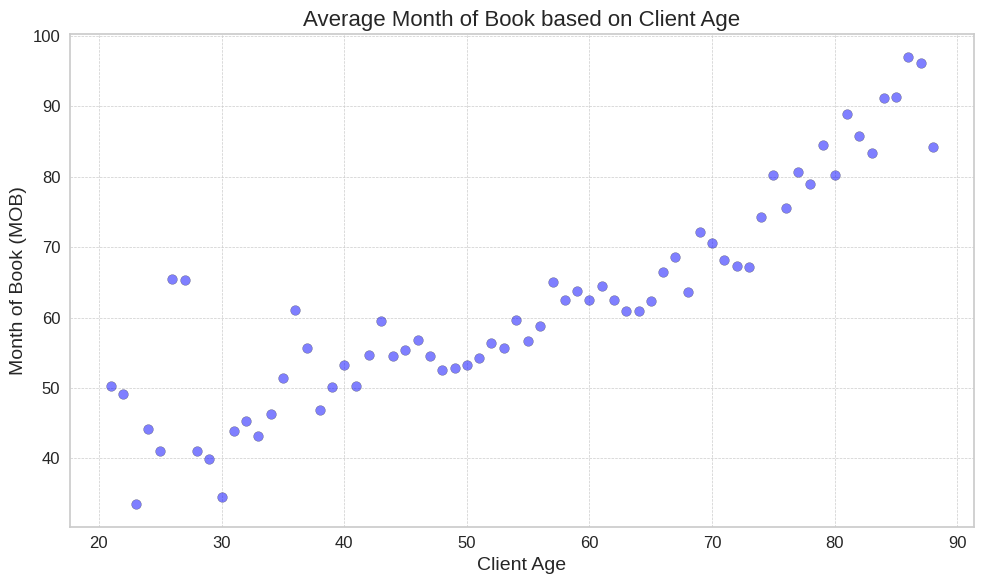

In [ ]:
age_mob = df_clean.groupby(['client_age']).mean()[['MOB']].reset_index()

plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(age_mob['client_age'], age_mob['MOB'], color='blue', alpha=0.5, edgecolor='k')  # Adjust color, transparency, and edge color

# Add labels and title with a larger font size for better readability
plt.xlabel('Client Age', fontsize=14)
plt.ylabel('Month of Book (MOB)', fontsize=14)
plt.title('Average Month of Book based on Client Age', fontsize=16)

# Improve the tick marks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add gridlines with a lighter style for a cleaner look
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping
plt.show()

As we can see here that older user tend to have longer MOB, meaning older age started using loan on early age

## EDA for average age and total user based on age group

In [ ]:
# calculate each min and max age
max_age = df_clean['client_age'].max()
min_age = df_clean['client_age'].min()
print(max_age, min_age)

88 21


In [ ]:
# average age
df_clean['client_age'].mean()

58.527525906735754

Average user is of age 58-59

In [ ]:
# categorize the age group
pd.cut(df_clean['client_age'], [min_age, 30, 40, 50, 60, 70, 80, max_age], include_lowest=True)

0        (20.999, 30.0]
1          (50.0, 60.0]
2          (60.0, 70.0]
3        (20.999, 30.0]
4          (30.0, 40.0]
              ...      
12482      (50.0, 60.0]
12483      (60.0, 70.0]
12484      (40.0, 50.0]
12485      (40.0, 50.0]
12486      (40.0, 50.0]
Name: client_age, Length: 12352, dtype: category
Categories (7, interval[float64, right]): [(20.999, 30.0] < (30.0, 40.0] < (40.0, 50.0] <
                                           (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0] <
                                           (80.0, 88.0]]

In [ ]:
# put in new column 'age_group'
df_clean['age_group'] = pd.cut(df_clean['client_age'], [min_age, 30, 40, 50, 60, 70, 80, max_age], include_lowest=True)
df_clean[['client_age', 'age_group']]

client_age       age_group
0              26  (20.999, 30.0]
1              51    (50.0, 60.0]
2              70    (60.0, 70.0]
3              25  (20.999, 30.0]
4              33    (30.0, 40.0]
...           ...             ...
12482          52    (50.0, 60.0]
12483          70    (60.0, 70.0]
12484          41    (40.0, 50.0]
12485          47    (40.0, 50.0]
12486          47    (40.0, 50.0]

[12352 rows x 2 columns]

In [ ]:
#check value
df_clean['age_group'].value_counts().to_frame()

age_group
(70.0, 80.0]         2551
(60.0, 70.0]         2303
(40.0, 50.0]         2235
(50.0, 60.0]         2191
(30.0, 40.0]         1554
(80.0, 88.0]         1027
(20.999, 30.0]        491

The largest age group is from age 71-80

## Account activity level; Median months since last transaction

In the data dictionary, the account activity level “X” is said to be the most active transacting compared to other levels. Is it true? Present your findings in a data visualization. ()

In [ ]:
# Group by account activity level and calculate median months since the last transaction from each level.
df_clean.groupby('account_activity_level')[['month_since_last_sales']].median()

month_since_last_sales
account_activity_level                        
X                                         18.0
Y                                         18.0
Z                                         19.0

In [ ]:
# alt using to_frame
df_clean.groupby(['account_activity_level'])['month_since_last_sales'].median().to_frame()

month_since_last_sales
account_activity_level                        
X                                         18.0
Y                                         18.0
Z                                         19.0

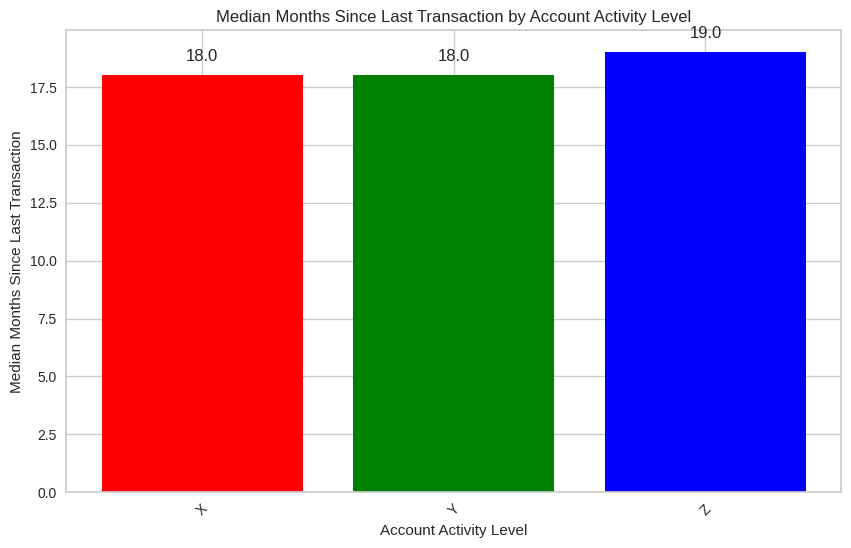

In [ ]:
# Calculate median months since last transaction for each account activity level
median_months = df_clean.groupby(['account_activity_level'])['month_since_last_sales'].median().reset_index()

# Create a bar chart with different colors for each bar/category
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']  # Define a list of colors
bars = plt.bar(median_months['account_activity_level'], median_months['month_since_last_sales'], color=colors)
plt.xlabel('Account Activity Level')
plt.ylabel('Median Months Since Last Transaction')
plt.title('Median Months Since Last Transaction by Account Activity Level')
plt.xticks(rotation=45)  # Rotate labels to make them readable

# Add median numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.show()

We can see here that the median for account_level **X** and **Y** are equally same, 18 month since last sales

## Account Activity Level, Average count of transaction

In [ ]:
# Alternatively, calculate the average number of transactions in the past 3 years for each level.
df_clean.groupby('account_activity_level')['cnt_sales_L36M'].mean().reset_index()

account_activity_level  cnt_sales_L36M
0                      X        3.284619
1                      Y        2.339471
2                      Z        1.228571

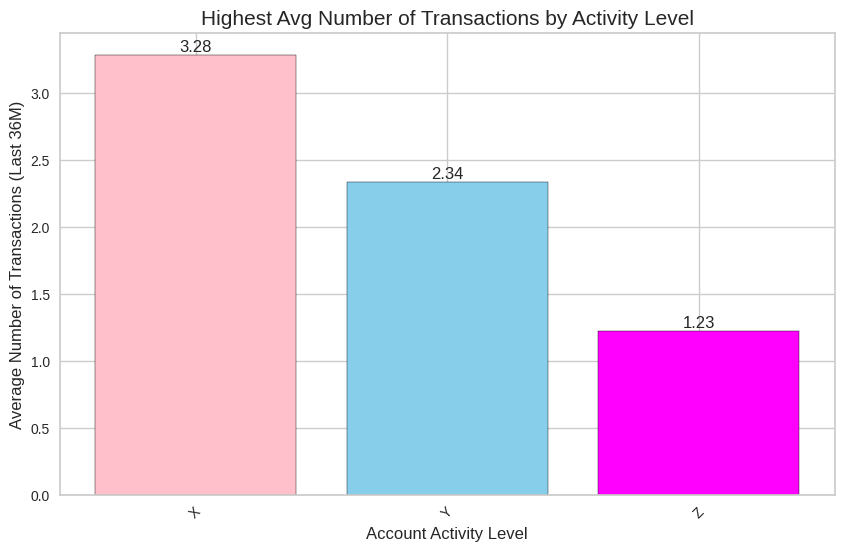

In [ ]:
# Use a bar chart to present the result.
acc_act_lvl = df_clean.groupby(['account_activity_level'])['cnt_sales_L36M'].mean()

# Making the bar plot beautiful
plt.figure(figsize=(10, 6))  # Set the figure size
colors = ['pink', 'skyblue', 'magenta']
bars = plt.bar(acc_act_lvl.index, acc_act_lvl.values, color=colors, edgecolor='black')  # Customize bar colors and edges

plt.title('Highest Avg Number of Transactions by Activity Level', fontsize=15)  # Set title and font size
plt.xlabel('Account Activity Level', fontsize=12)  # Set x-axis label and font size
plt.ylabel('Average Number of Transactions (Last 36M)', fontsize=12)  # Set y-axis label and font size
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add numbers on top of the bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**Insight:**

Account activity level **X** has the highest average of number of transactions, which is around **3** times per transaction



## Profitability between male and female

Is it true that male clients generate higher profits compared to female clients?

In [ ]:
# Group by female flag and use aggregate statistics to check the difference of profitability between male and female clients.
df_clean.groupby(['gender'])['total_sales'].agg(['describe', 'sum'])

describe                                                              \
          count          mean           std  min      25%      50%      75%   
gender                                                                        
Female   6674.0  32373.068625  20617.679782  0.0  20000.0  28990.0  40840.0   
Male     5678.0  32835.269461  21772.007063  0.0  20000.0  27500.0  42000.0   

                          sum  
             max  total_sales  
gender                         
Female  244400.0  216057860.0  
Male    225000.0  186438660.0

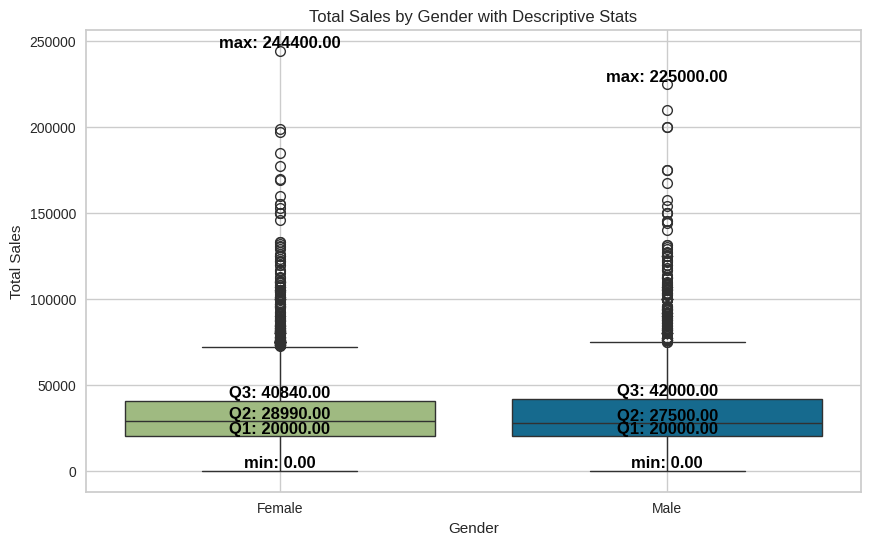

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='gender', y='total_sales', hue='gender', data=df_clean, order=['Female','Male'])

# Calculate the quartiles and extremes for annotations
stats = df_clean.groupby(['gender'])['total_sales'].describe()

# Labels for the statistics
labels = ['min:', 'Q1:', 'Q2:', 'Q3:', 'max:']

# Iterate over positions and data to add annotations
for i, gender in enumerate(stats.index):
    y = stats.loc[gender, [
        'min', '25%', '50%', '75%', 'max'
    ]]
    for j, value in enumerate(y):
        plt.text(i, value, f'{labels[j]} {value:.2f}',
                 ha='center', va='bottom',
                 fontweight='bold', color='black')

plt.title('Total Sales by Gender with Descriptive Stats')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.grid(True)
plt.show()

There are many outliers by looking at this boxplot based on total sales. This only total sales, to check PROFIT we need to have new column 'profit', which is **total sales times 2.4%** of profit margin

In [ ]:
# make column profit
df_clean['profit'] = df_clean['total_sales'] * 0.024
df_clean.head()

account_id account_activity_level customer_value_level    MOB  flag_female  \
0  100000006                      X                    A   91.0            0   
1  100000038                      X                    A   69.0            0   
2  100000382                      X                    A  123.0            1   
3  100000612                      X                    A   84.0            1   
4  100000757                      X                    A   40.0            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  gender  total_sales  \
0                        5 1996-11-03          26    Male      25000.0   
1                       10 1971-04-24          51    Male      45000.0   
2                        6 1953-01-16          70  Female     103980.0   
3                        7 1997-06-07          25  Female     154980.0   
4                        5 1989-09-13          33    Male      75000.0   

        age_group   profit  
0  (20.999, 30.0]   600.00  
1    (50.0, 60.0]  1080.00  
2    (60.0, 70.0]  2495.52  
3  (20.999, 30.0]  3719.52  
4    (30.0, 40.0]  1800.00

In [ ]:
df_clean.groupby(['gender'])['profit'].agg(['describe', 'sum'])

describe                                                               \
          count        mean         std  min    25%     50%      75%     max   
gender                                                                         
Female   6674.0  776.953647  494.824315  0.0  480.0  695.76   980.16  5865.6   
Male     5678.0  788.046467  522.528170  0.0  480.0  660.00  1008.00  5400.0   

               sum  
            profit  
gender              
Female  5185388.64  
Male    4474527.84

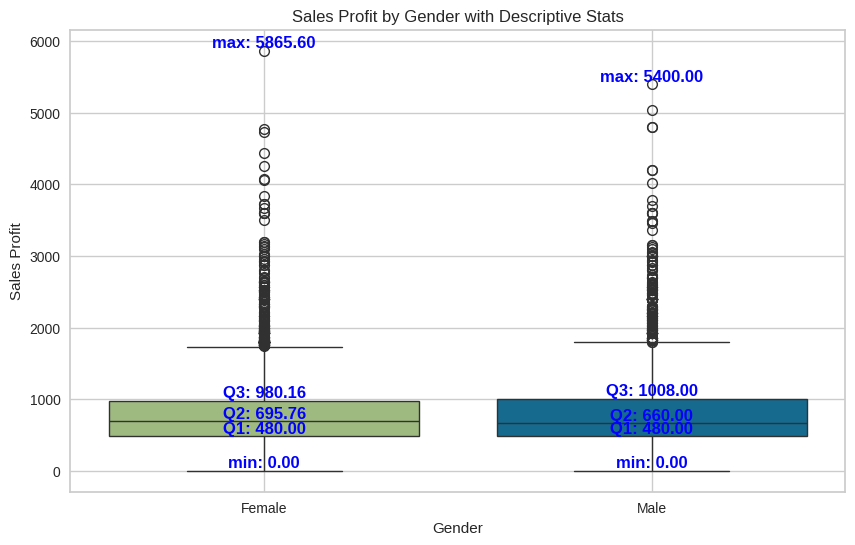

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='gender', y='profit', hue='gender', data=df_clean, order=['Female','Male'])

# Calculate the quartiles and extremes for annotations
stats = df_clean.groupby(['gender'])['profit'].describe()

# Labels for the statistics
labels = ['min:', 'Q1:', 'Q2:', 'Q3:', 'max:']

# Iterate over positions and data to add annotations
for i, gender in enumerate(stats.index):
    y = stats.loc[gender, [
        'min', '25%', '50%', '75%', 'max'
    ]]
    for j, value in enumerate(y):
        plt.text(i, value, f'{labels[j]} {value:.2f}',
                 ha='center', va='bottom',
                 fontweight='bold', color='blue')

plt.title('Sales Profit by Gender with Descriptive Stats')
plt.ylabel('Sales Profit')
plt.xlabel('Gender')
plt.grid(True)
plt.show()

Insight for profit:

*   List item
*   List item

column.

# Insight

Calculate the proportion of sales in the past 3 years based on generations (Boomer, Gen-X, Millenial, Gen-Z, Gen-Alpha). Does the sales skew toward a certain demographic group? If so, what is your recommendation for the bank to improve sales performance? Present your findings in a data visualization.


In [ ]:
# Use .dt.year to extract the year of birth from birth date, then use pd.cut to separate the year into generations.)
df_clean['birth_year'] = df_clean['birth_date'].dt.year
df_gen = df_clean.copy()
df_gen

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
0                          26                        5 1996-11-03          26   
1                          25                       10 1971-04-24          51   
2                          18                        6 1953-01-16          70   
3                          14                        7 1997-06-07          25   
4                          17                        5 1989-09-13          33   
...                       ...                      ...        ...         ...   
12482                      21                        3 1970-05-27          52   
12483                      19                        4 1952-03-04          70   
12484                      21                        4 1981-10-23          41   
12485                      17                        6 1975-07-21          47   
12486                      21                        5 1975-08-21          47   

       gender  total_sales       age_group   profit  birth_year  
0        Male      25000.0  (20.999, 30.0]   600.00        1996  
1        Male      45000.0    (50.0, 60.0]  1080.00        1971  
2      Female     103980.0    (60.0, 70.0]  2495.52        1953  
3      Female     154980.0  (20.999, 30.0]  3719.52        1997  
4        Male      75000.0    (30.0, 40.0]  1800.00        1989  
...       ...          ...             ...      ...         ...  
12482  Female      15000.0    (50.0, 60.0]   360.00        1970  
12483    Male      20000.0    (60.0, 70.0]   480.00        1952  
12484    Male      20000.0    (40.0, 50.0]   480.00        1981  
12485    Male      40000.0    (40.0, 50.0]   960.00        1975  
12486  Female      40000.0    (40.0, 50.0]   960.00        1975  

[12352 rows x 17 columns]

In [ ]:
min_year = df_gen['birth_year'].min()
min_year

1934

In [ ]:
max_year = df_gen['birth_year'].max()
max_year

2001

Min birth year is 1934, and max birth year is 2001. We will categorized based on generations

In [ ]:
min_year = df_gen['birth_year'].min()  # This should be the minimum birth year in your data
max_age = df_gen['birth_year'].max()   # This should be the maximum birth year in your data

df_gen['generation'] = pd.cut(df_gen['birth_year'], bins=[min_year, 1946, 1964, 1980, 1996, max_age], labels=['Pre-Boomer','Boomer','Gen-X','Millenials','Gen-Z'], include_lowest=True)

In [ ]:
#showing series
df_gen['generation'].value_counts()

Boomer        4247
Gen-X         3603
Pre-Boomer    2250
Millenials    2103
Gen-Z          149
Name: generation, dtype: int64

In [ ]:
#showing dataframe
df_gen.groupby('generation')[['birth_year']].count()

birth_year
generation            
Pre-Boomer        2250
Boomer            4247
Gen-X             3603
Millenials        2103
Gen-Z              149

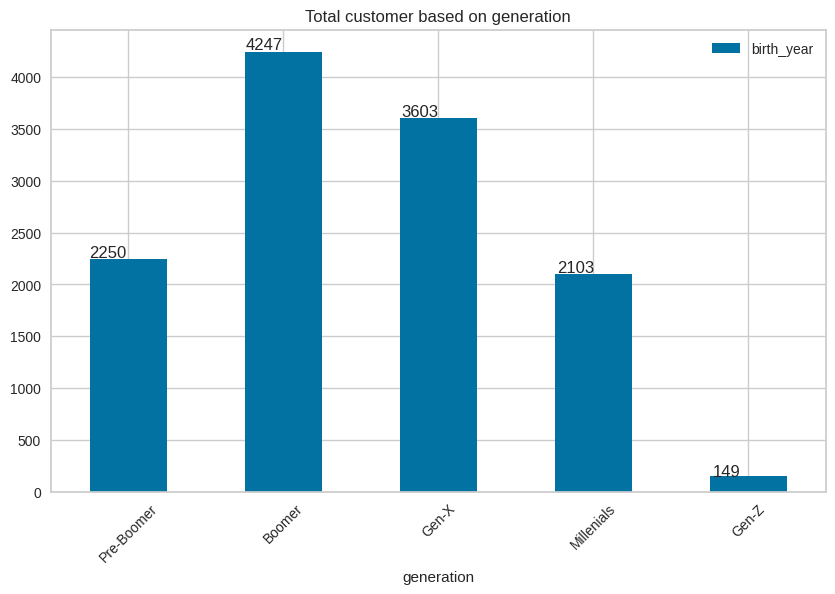

In [ ]:
# Group by generation and count
num_gen = df_gen.groupby('generation')[['birth_year']].count()

# Plotting
ax = num_gen.plot(kind='bar', title='Total customer based on generation', rot=45, figsize=(10, 6))

# Adding text on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

Customer are mostly from Boomer generation, second is Gen-X

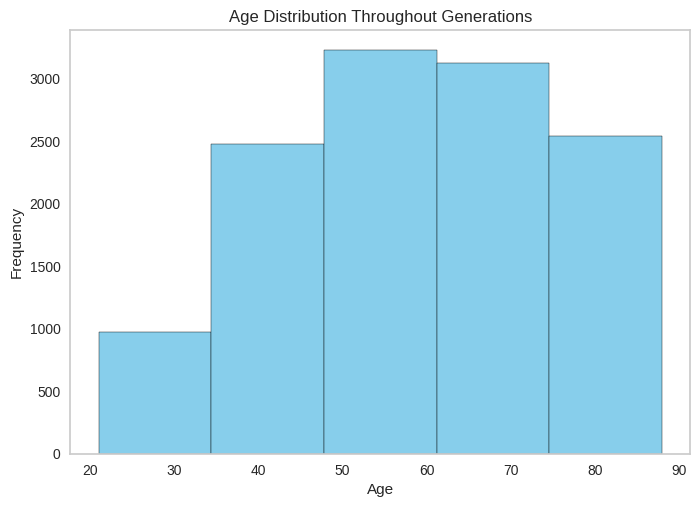

In [ ]:
# Adjusting the histogram to make it cleaner
df_gen['client_age'].hist(bins=5, edgecolor='black', color='skyblue')

plt.title('Age Distribution Throughout Generations')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)  # Turn off the grid to make the plot cleaner
plt.show()

Customer are mostly from age 70-80

In [ ]:
# Calculate the total sales for each generation in the past 3 years
sales_by_generation = df_gen.groupby('generation')['total_sales'].sum()

# Calculate the total sales across all generations in the past 3 years
total_sales = sales_by_generation.sum()

# Calculate the proportion of sales for each generation
proportion_sales_by_generation = sales_by_generation / total_sales

# Display the proportion of sales by generation
proportion_sales_by_generation

generation
Pre-Boomer    0.185341
Boomer        0.347560
Gen-X         0.295629
Millenials    0.159083
Gen-Z         0.012387
Name: total_sales, dtype: float64

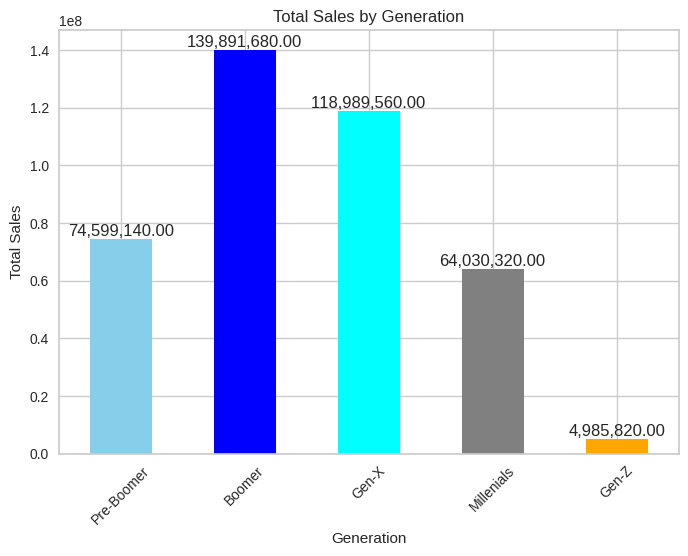

In [ ]:
# Plotting the bar chart
sales_by_generation.plot(kind='bar', color=['skyblue','blue','cyan','gray','orange'], rot=45)

# Adding text on top of each bar with number format including comma
for index, value in enumerate(sales_by_generation):
    plt.text(index, value, f'{value:,.2f}', ha='center', va='bottom')

plt.title('Total Sales by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Sales')
plt.show()

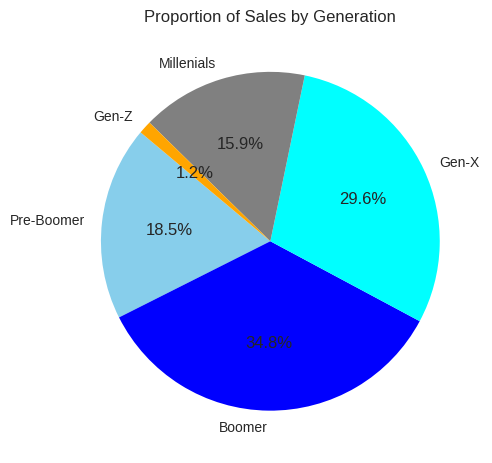

In [ ]:
# Plotting the proportion of sales by generation as a pie chart
colors = ['skyblue', 'blue', 'cyan', 'gray', 'orange']
proportion_sales_by_generation.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Proportion of Sales by Generation')
plt.ylabel('')  # Hide the y-label as it's not needed here
plt.show()

Insight:

Is there a relationship between increasing the number of email and SMS messages and improved sales performance? If so, what is your recommendation for the bank to improve sales performance? Present your findings in a line chart.


In [ ]:
#pivoting gen for avg total sales
df_gen.pivot_table(index='count_direct_promo_L12M', columns='generation', values='total_sales', aggfunc='mean', margins=True)

generation                 Pre-Boomer        Boomer          Gen-X  \
count_direct_promo_L12M                                              
0                        25000.000000      0.000000    9000.000000   
1                         7000.000000   8068.235294       0.000000   
2                        14310.227273  10109.142857    8016.666667   
3                        15052.631579  13690.000000   13696.155844   
4                        22363.858696  21825.716129   21916.352785   
5                        29309.323181  28785.951923   30424.595506   
6                        40295.617978  41438.032787   43597.684124   
7                        51930.591133  55584.516971   58355.232068   
8                        50480.588235  45090.540541   54767.500000   
9                        44340.000000  47355.263158   47100.000000   
10                       33116.666667  55680.000000   48333.333333   
11                       52705.000000  76493.333333   54576.666667   
12                       48500.000000           NaN   95720.000000   
13                                NaN  62723.333333   50000.000000   
14                       53000.000000           NaN   75000.000000   
16                                NaN           NaN  105050.000000   
All                      33155.173333  32938.940429   33025.134610   

generation                 Millenials         Gen-Z            All  
count_direct_promo_L12M                                             
0                                 NaN           NaN   10400.000000  
1                            0.000000      0.000000    5311.794872  
2                        12707.058824   2500.000000   10585.654206  
3                        11704.198473   9931.818182   13395.936000  
4                        21213.395445  17194.827586   21757.775010  
5                        28271.854043  31947.352941   29313.236447  
6                        42609.073244  49883.409091   42123.519048  
7                        51603.000000  79688.181818   55272.431866  
8                        57925.384615  48010.000000   50098.235294  
9                        42187.500000           NaN   46157.777778  
10                       47000.000000           NaN   48397.500000  
11                       35885.000000           NaN   62705.882353  
12                       55500.000000           NaN   64991.428571  
13                                NaN           NaN   59542.500000  
14                                NaN           NaN   64000.000000  
16                                NaN           NaN  105050.000000  
All                      30447.132668  33461.879195   32585.534326

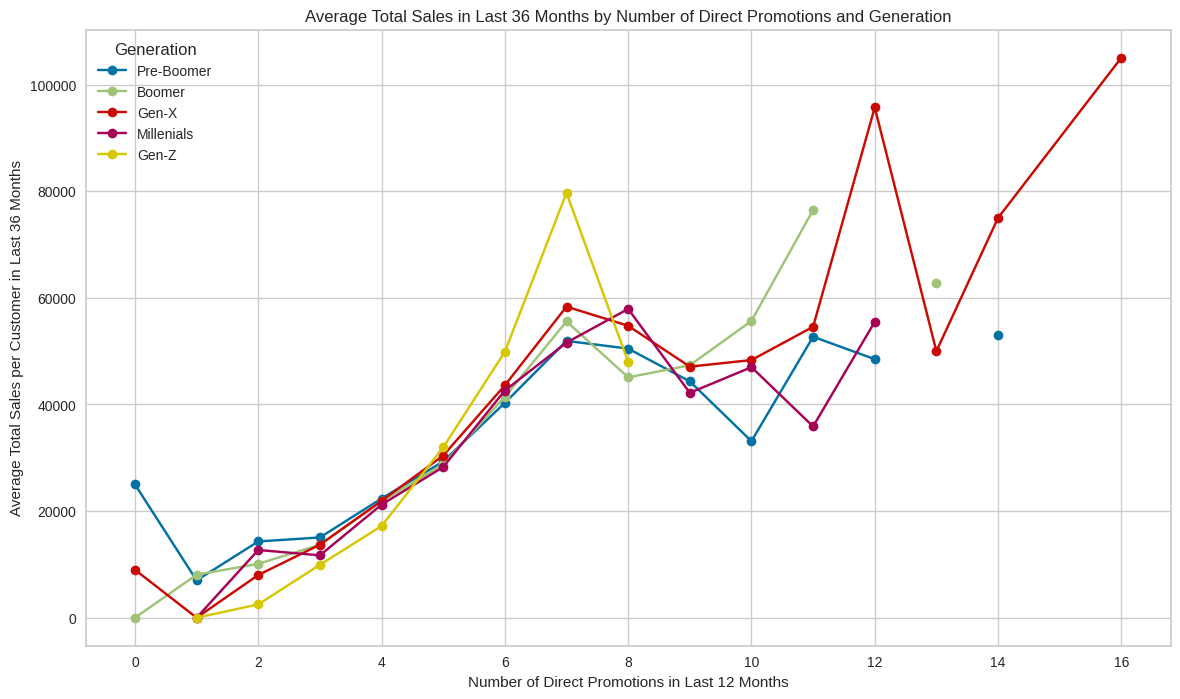

In [ ]:
pivot_data_total = df_gen.pivot_table(index='count_direct_promo_L12M', columns='generation', values='total_sales', aggfunc='mean')

# Plotting the line chart based on the pivot table
pivot_data_total.plot(figsize=(14, 8), marker='o', linestyle='-')
plt.title('Average Total Sales in Last 36 Months by Number of Direct Promotions and Generation')
plt.xlabel('Number of Direct Promotions in Last 12 Months')
plt.ylabel('Average Total Sales per Customer in Last 36 Months')
plt.grid(True)
plt.legend(title='Generation')
plt.show()

In [ ]:
#pivoting gen for avg cnt sales
df_gen.pivot_table(index='count_direct_promo_L12M', columns='generation', values='cnt_sales_L36M', margins=True)

generation               Pre-Boomer     Boomer      Gen-X  Millenials  \
count_direct_promo_L12M                                                 
0                          1.000000   0.000000   1.333333         NaN   
1                          0.800000   0.764706   0.000000    0.000000   
2                          1.409091   1.000000   0.550000    1.147059   
3                          1.485380   0.990244   0.815584    0.709924   
4                          1.994565   1.723871   1.458886    1.358178   
5                          2.871404   2.461538   2.217978    2.043393   
6                          3.687890   3.530055   3.428805    3.576981   
7                          4.344828   4.407311   4.556962    4.208333   
8                          4.588235   4.000000   5.250000    4.153846   
9                          4.800000   3.473684   3.833333    3.750000   
10                         3.833333   5.000000   4.000000    8.000000   
11                         5.125000   5.866667   4.555556    6.000000   
12                         5.000000        NaN   7.000000    7.000000   
13                              NaN  10.000000   2.000000         NaN   
14                        10.000000        NaN   3.000000         NaN   
16                              NaN        NaN  11.000000         NaN   
All                        3.057778   2.740287   2.472384    2.345697   

generation                  Gen-Z        All  
count_direct_promo_L12M                       
0                             NaN   1.000000  
1                        0.000000   0.538462  
2                        0.166667   0.957944  
3                        0.590909   0.938400  
4                        1.275862   1.603570  
5                        2.529412   2.401372  
6                        4.659091   3.550000  
7                        5.363636   4.417191  
8                        5.000000   4.431373  
9                             NaN   3.888889  
10                            NaN   4.833333  
11                            NaN   5.352941  
12                            NaN   6.428571  
13                            NaN   8.000000  
14                            NaN   6.500000  
16                            NaN  11.000000  
All                      2.758389   2.653012

<Figure size 1400x800 with 0 Axes>

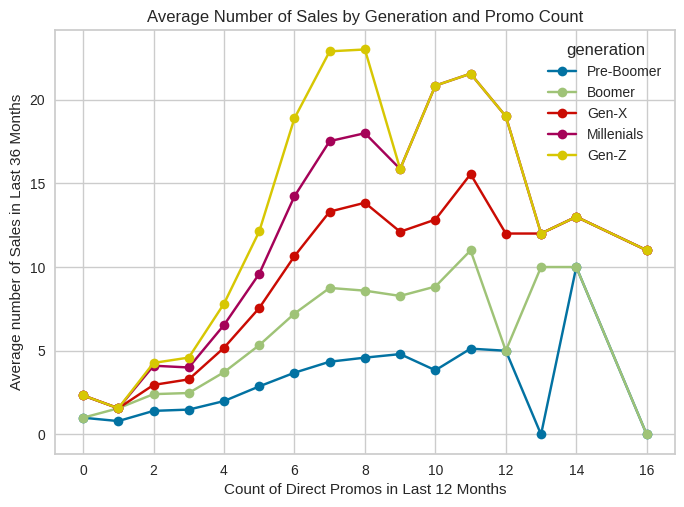

In [ ]:
# Pivot the data to get generations as columns and count of direct promos as index
pivot_data = df_gen.pivot_table(index='count_direct_promo_L12M', columns='generation', values='cnt_sales_L36M')

# Plotting the stacked line chart
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='line', stacked=True, grid=True, marker='o', linestyle='-')
plt.title('Average Number of Sales by Generation and Promo Count')
plt.xlabel('Count of Direct Promos in Last 12 Months')
plt.ylabel('Average number of Sales in Last 36 Months')
plt.show()

Insight:


Most sales occured when customer got 6 promotions

# Customer Segmentation - RFM

Identify the segments that have higher average sales per client, higher average transaction frequency per client, higher revenue generated, and/or a larger proportion of clients with no sales.


Re-read the business background, and identify business opportunities associated with the user persona in your result. (Hint: Look into your cluster result and consider this question: If we want to focus on one or two of your segments, which segments are more likely to give more profit for RevoBank?)

Before we do RFM analysis we need to exclude the outlier as seen in the boxplot chart above from total sales.

In [ ]:
df_gen2 = df_gen.copy()
df_gen2

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
0                          26                        5 1996-11-03          26   
1                          25                       10 1971-04-24          51   
2                          18                        6 1953-01-16          70   
3                          14                        7 1997-06-07          25   
4                          17                        5 1989-09-13          33   
...                       ...                      ...        ...         ...   
12482                      21                        3 1970-05-27          52   
12483                      19                        4 1952-03-04          70   
12484                      21                        4 1981-10-23          41   
12485                      17                        6 1975-07-21          47   
12486                      21                        5 1975-08-21          47   

       gender  total_sales       age_group   profit  birth_year  generation  
0        Male      25000.0  (20.999, 30.0]   600.00        1996  Millenials  
1        Male      45000.0    (50.0, 60.0]  1080.00        1971       Gen-X  
2      Female     103980.0    (60.0, 70.0]  2495.52        1953      Boomer  
3      Female     154980.0  (20.999, 30.0]  3719.52        1997       Gen-Z  
4        Male      75000.0    (30.0, 40.0]  1800.00        1989  Millenials  
...       ...          ...             ...      ...         ...         ...  
12482  Female      15000.0    (50.0, 60.0]   360.00        1970       Gen-X  
12483    Male      20000.0    (60.0, 70.0]   480.00        1952      Boomer  
12484    Male      20000.0    (40.0, 50.0]   480.00        1981  Millenials  
12485    Male      40000.0    (40.0, 50.0]   960.00        1975       Gen-X  
12486  Female      40000.0    (40.0, 50.0]   960.00        1975       Gen-X  

[12352 rows x 18 columns]

## Exclude outlier for analysis

### avg_sales, not used


In [ ]:
# exclude outlier from avg_sales_L36M
# Calculating the IQR for a DataFrame
Q1 = df_gen2['avg_sales_L36M'].quantile(0.25)
Q3 = df_gen2['avg_sales_L36M'].quantile(0.75)
IQR = Q3 - Q1

print('Q1 : ',Q1)
print('Q3 : ',Q3)
print('IQR: ',IQR)

Q1 :  9170.0
Q3 :  20000.0
IQR:  10830.0


In [ ]:
# Outlier detection
min_box = Q1 - 1.5*IQR
max_box = Q3 + 1.5*IQR

criteria1 = (df_gen2['avg_sales_L36M'] <= min_box)
criteria2 = (df_gen2['avg_sales_L36M'] >= max_box)

df_gen2[criteria1 | criteria2]

account_id account_activity_level customer_value_level    MOB  \
1255  100102844                      X                    A  124.0   
2294  100193185                      X                    A   58.0   
3794  100312142                      X                    A  105.0   
4077  100337304                      X                    E   56.0   
4839  100405984                      X                    A   57.0   
7753  100651393                      X                    B  126.0   

      flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
1255            0         70000.0               1     70000.0   
2294            0        100000.0               2    100000.0   
3794            0         37500.0               2     40000.0   
4077            1         50000.0               1     25000.0   
4839            0        200000.0               1    200000.0   
7753            1         40000.0               1     40000.0   

      month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
1255                      20                        6 1975-03-23          47   
2294                      27                        3 1978-05-04          44   
3794                       7                        7 1958-08-03          64   
4077                      18                        6 1985-02-18          37   
4839                      25                        6 1954-04-28          68   
7753                      24                        5 1946-07-18          76   

      gender  total_sales     age_group  profit  birth_year  generation  
1255    Male      70000.0  (40.0, 50.0]  1680.0        1975       Gen-X  
2294    Male     200000.0  (40.0, 50.0]  4800.0        1978       Gen-X  
3794    Male      75000.0  (60.0, 70.0]  1800.0        1958      Boomer  
4077  Female      50000.0  (30.0, 40.0]  1200.0        1985  Millenials  
4839    Male     200000.0  (60.0, 70.0]  4800.0        1954      Boomer  
7753  Female      40000.0  (70.0, 80.0]   960.0        1946  Pre-Boomer

### total sales, used

In [ ]:
# total sales
# Calculating the IQR for a DataFrame
Q1t = df_gen2['total_sales'].quantile(0.25)
Q3t = df_gen2['total_sales'].quantile(0.75)
IQRt = Q3 - Q1

print('Q1 : ',Q1t)
print('Q3 : ',Q3t)
print('IQR: ',IQRt)

Q1 :  20000.0
Q3 :  42000.0
IQR:  10830.0


In [ ]:
# Outlier detection
min_box_t = Q1t - 1.5*IQRt
max_box_t = Q3t + 1.5*IQRt

criteria1_t = (df_gen2['total_sales'] <= min_box_t)
criteria2_t = (df_gen2['total_sales'] >= max_box_t)

df_gen2[criteria1_t | criteria2_t]

account_id account_activity_level customer_value_level    MOB  \
2      100000382                      X                    A  123.0   
3      100000612                      X                    A   84.0   
4      100000757                      X                    A   40.0   
15     100001700                      X                    A  127.0   
23     100002370                      Z                    A  110.0   
...          ...                    ...                  ...    ...   
12455  101057953                      X                    E  105.0   
12461  101058331                      Z                    E   55.0   
12462  101058396                      Y                    E   52.0   
12467  101058696                      X                    E   77.0   
12475  101059349                      X                    E   30.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
15               0         26250.0               4     25000.0   
23               0             0.0               0     15000.0   
...            ...             ...             ...         ...   
12455            0         18800.0               5     20000.0   
12461            1             0.0               0     15000.0   
12462            1          9000.0               7     10000.0   
12467            1         17250.0               5     20000.0   
12475            1         26670.0               3     25000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
2                          18                        6 1953-01-16          70   
3                          14                        7 1997-06-07          25   
4                          17                        5 1989-09-13          33   
15                          4                        7 1940-03-18          82   
23                         56                        3 1972-08-18          50   
...                       ...                      ...        ...         ...   
12455                      16                        6 1947-04-30          75   
12461                      55                        2 1949-03-26          73   
12462                      18                        6 1952-10-15          70   
12467                      18                        7 1958-02-21          64   
12475                      24                        6 1989-11-27          33   

       gender  total_sales       age_group   profit  birth_year  generation  
2      Female     103980.0    (60.0, 70.0]  2495.52        1953      Boomer  
3      Female     154980.0  (20.999, 30.0]  3719.52        1997       Gen-Z  
4        Male      75000.0    (30.0, 40.0]  1800.00        1989  Millenials  
15       Male     105000.0    (80.0, 88.0]  2520.00        1940  Pre-Boomer  
23       Male          0.0    (40.0, 50.0]     0.00        1972       Gen-X  
...       ...          ...             ...      ...         ...         ...  
12455    Male      94000.0    (70.0, 80.0]  2256.00        1947      Boomer  
12461  Female          0.0    (70.0, 80.0]     0.00        1949      Boomer  
12462  Female      63000.0    (60.0, 70.0]  1512.00        1952      Boomer  
12467  Female      86250.0    (60.0, 70.0]  2070.00        1958      Boomer  
12475  Female      80010.0    (30.0, 40.0]  1920.24        1989  Millenials  

[1885 rows x 18 columns]

## PICK TOTAL SALES



Decided to pick total sales for RFM analysis as total sales is more align for the analysis

In [ ]:
# remove outlier total_sales by and copy data frame
df_rfm = df_gen2[~(criteria1_t | criteria2_t)].copy()
df_rfm

account_id account_activity_level customer_value_level    MOB  \
0      100000006                      X                    A   91.0   
1      100000038                      X                    A   69.0   
5      100000932                      X                    A   45.0   
6      100000996                      X                    A  105.0   
7      100001201                      X                    A   41.0   
...          ...                    ...                  ...    ...   
12482  101059900                      Z                    E   21.0   
12483  101059915                      Z                    E   19.0   
12484  101059935                      Z                    E   21.0   
12485  101059941                      Z                    E   17.0   
12486  101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
5                1          9000.0               4     10000.0   
6                1         10000.0               5     10000.0   
7                0         25000.0               2     25000.0   
...            ...             ...             ...         ...   
12482            1         15000.0               1     15000.0   
12483            0         20000.0               1     20000.0   
12484            0         20000.0               1     20000.0   
12485            0         20000.0               2     20000.0   
12486            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
0                          26                        5 1996-11-03          26   
1                          25                       10 1971-04-24          51   
5                          18                        6 1971-11-05          51   
6                          19                        6 1975-01-06          48   
7                          24                        3 1973-09-04          49   
...                       ...                      ...        ...         ...   
12482                      21                        3 1970-05-27          52   
12483                      19                        4 1952-03-04          70   
12484                      21                        4 1981-10-23          41   
12485                      17                        6 1975-07-21          47   
12486                      21                        5 1975-08-21          47   

       gender  total_sales       age_group  profit  birth_year  generation  
0        Male      25000.0  (20.999, 30.0]   600.0        1996  Millenials  
1        Male      45000.0    (50.0, 60.0]  1080.0        1971       Gen-X  
5      Female      36000.0    (50.0, 60.0]   864.0        1971       Gen-X  
6      Female      50000.0    (40.0, 50.0]  1200.0        1975       Gen-X  
7        Male      50000.0    (40.0, 50.0]  1200.0        1973       Gen-X  
...       ...          ...             ...     ...         ...         ...  
12482  Female      15000.0    (50.0, 60.0]   360.0        1970       Gen-X  
12483    Male      20000.0    (60.0, 70.0]   480.0        1952      Boomer  
12484    Male      20000.0    (40.0, 50.0]   480.0        1981  Millenials  
12485    Male      40000.0    (40.0, 50.0]   960.0        1975       Gen-X  
12486  Female      40000.0    (40.0, 50.0]   960.0        1975       Gen-X  

[10467 rows x 18 columns]

Pick only relevant columns for RFM

In [ ]:
df_rfm2 = df_rfm[['account_id', 'gender', 'generation', 'month_since_last_sales','cnt_sales_L36M','total_sales']]
df_rfm2

account_id  gender  generation  month_since_last_sales  cnt_sales_L36M  \
0      100000006    Male  Millenials                      26               1   
1      100000038    Male       Gen-X                      25               5   
5      100000932  Female       Gen-X                      18               4   
6      100000996  Female       Gen-X                      19               5   
7      100001201    Male       Gen-X                      24               2   
...          ...     ...         ...                     ...             ...   
12482  101059900  Female       Gen-X                      21               1   
12483  101059915    Male      Boomer                      19               1   
12484  101059935    Male  Millenials                      21               1   
12485  101059941    Male       Gen-X                      17               2   
12486  101060006  Female       Gen-X                      21               2   

       total_sales  
0          25000.0  
1          45000.0  
5          36000.0  
6          50000.0  
7          50000.0  
...            ...  
12482      15000.0  
12483      20000.0  
12484      20000.0  
12485      40000.0  
12486      40000.0  

[10467 rows x 6 columns]

In [ ]:
df_rfm2 = df_rfm2.rename(columns={'month_since_last_sales':'recency', 'cnt_sales_L36M':'frequency', 'total_sales':'monetary'})
df_rfm2 = df_rfm2.set_index('account_id')
df_rfm2

gender  generation  recency  frequency  monetary
account_id                                                  
100000006     Male  Millenials       26          1   25000.0
100000038     Male       Gen-X       25          5   45000.0
100000932   Female       Gen-X       18          4   36000.0
100000996   Female       Gen-X       19          5   50000.0
100001201     Male       Gen-X       24          2   50000.0
...            ...         ...      ...        ...       ...
101059900   Female       Gen-X       21          1   15000.0
101059915     Male      Boomer       19          1   20000.0
101059935     Male  Millenials       21          1   20000.0
101059941     Male       Gen-X       17          2   40000.0
101060006   Female       Gen-X       21          2   40000.0

[10467 rows x 5 columns]

## RFM SEGMENTS

### Recency

In [ ]:
pd.qcut(df_rfm2['recency'], q=5)

account_id
100000006    (21.0, 28.0]
100000038    (21.0, 28.0]
100000932    (17.0, 19.0]
100000996    (17.0, 19.0]
100001201    (21.0, 28.0]
                 ...     
101059900    (19.0, 21.0]
101059915    (17.0, 19.0]
101059935    (19.0, 21.0]
101059941    (16.0, 17.0]
101060006    (19.0, 21.0]
Name: recency, Length: 10467, dtype: category
Categories (5, interval[float64, right]): [(2.999, 16.0] < (16.0, 17.0] < (17.0, 19.0] <
                                           (19.0, 21.0] < (21.0, 28.0]]

In [ ]:
pd.qcut(df_rfm2['recency'], q=5).value_counts()

(2.999, 16.0]    2628
(17.0, 19.0]     2512
(21.0, 28.0]     2041
(16.0, 17.0]     1676
(19.0, 21.0]     1610
Name: recency, dtype: int64

### Frequency

In [ ]:
#pd.qcut(df_rfm2['frequency'], q=5)
# karena error jd drop duplicates

In [ ]:
pd.qcut(df_rfm2['frequency'], q=5, duplicates='drop')

account_id
100000006    (0.999, 2.0]
100000038     (4.0, 12.0]
100000932      (2.0, 4.0]
100000996     (4.0, 12.0]
100001201    (0.999, 2.0]
                 ...     
101059900    (0.999, 2.0]
101059915    (0.999, 2.0]
101059935    (0.999, 2.0]
101059941    (0.999, 2.0]
101060006    (0.999, 2.0]
Name: frequency, Length: 10467, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 4.0] < (4.0, 12.0]]

In [ ]:
pd.qcut(df_rfm2['frequency'], q=5, duplicates='drop').value_counts()

(0.999, 2.0]    6536
(2.0, 4.0]      2385
(4.0, 12.0]     1546
Name: frequency, dtype: int64

### Monetary

In [ ]:
pd.qcut(df_rfm2['monetary'], q=5)

account_id
100000006     (20000.0, 25000.0]
100000038     (40000.0, 58030.0]
100000932     (30000.0, 40000.0]
100000996     (40000.0, 58030.0]
100001201     (40000.0, 58030.0]
                    ...         
101059900    (3999.999, 20000.0]
101059915    (3999.999, 20000.0]
101059935    (3999.999, 20000.0]
101059941     (30000.0, 40000.0]
101060006     (30000.0, 40000.0]
Name: monetary, Length: 10467, dtype: category
Categories (5, interval[float64, right]): [(3999.999, 20000.0] < (20000.0, 25000.0] <
                                           (25000.0, 30000.0] < (30000.0, 40000.0] <
                                           (40000.0, 58030.0]]

In [ ]:
pd.qcut(df_rfm2['monetary'], q=5).value_counts()

(3999.999, 20000.0]    3554
(30000.0, 40000.0]     2107
(40000.0, 58030.0]     2039
(20000.0, 25000.0]     1586
(25000.0, 30000.0]     1181
Name: monetary, dtype: int64

To simplify the RFM score, let's assign a number of each bins

RECENCY
- 3-16: 5 (the best)
- 17- : 4
- 10-16: 3
- 16-19: 2
- 19-858: 1  (the worst)

FREQUENCY
- 0-4 : 2 (the worst)
- 4-5 : 3
- 5-7 : 4
- 7-16 : 5 (the best)

MONETARY
- (-25821.201, 20550.34] : 1 (the worst)
- (20550.34, 31048.2] : 2
- (31048.2, 46457.7] : 3
- (46457.7, 65669.34] : 4
- (65669.34, 137829.5] : 5 (the best)

In [ ]:
pd.qcut(df_rfm2['recency'], q=5, labels=['5','4','3','2','1'])

account_id
100000006    1
100000038    1
100000932    3
100000996    3
100001201    1
            ..
101059900    2
101059915    3
101059935    2
101059941    4
101060006    2
Name: recency, Length: 10467, dtype: category
Categories (5, object): ['5' < '4' < '3' < '2' < '1']

In [ ]:
# Let's create label based on that
df_rfm2['r_score'] = pd.qcut(df_rfm2['recency'], q=5, labels=['5','4','3','2','1'])
df_rfm2['f_score'] = pd.qcut(df_rfm2['frequency'], q=5, duplicates='drop', labels=['3','4','5'])
df_rfm2['m_score'] = pd.qcut(df_rfm2['monetary'], q=5, labels=['1','2','3','4','5'])
df_rfm2

gender  generation  recency  frequency  monetary r_score f_score  \
account_id                                                                     
100000006     Male  Millenials       26          1   25000.0       1       3   
100000038     Male       Gen-X       25          5   45000.0       1       5   
100000932   Female       Gen-X       18          4   36000.0       3       4   
100000996   Female       Gen-X       19          5   50000.0       3       5   
100001201     Male       Gen-X       24          2   50000.0       1       3   
...            ...         ...      ...        ...       ...     ...     ...   
101059900   Female       Gen-X       21          1   15000.0       2       3   
101059915     Male      Boomer       19          1   20000.0       3       3   
101059935     Male  Millenials       21          1   20000.0       2       3   
101059941     Male       Gen-X       17          2   40000.0       4       3   
101060006   Female       Gen-X       21          2   40000.0       2       3   

           m_score  
account_id          
100000006        2  
100000038        5  
100000932        4  
100000996        5  
100001201        5  
...            ...  
101059900        1  
101059915        1  
101059935        1  
101059941        4  
101060006        4  

[10467 rows x 8 columns]

In [ ]:
# Combine all scores. Data cut/qcut outputnya categorical dtypenya, jadi harus diubah ke str
df_rfm2['rfm_score'] = df_rfm2['r_score'].astype(str) + df_rfm2['f_score'].astype(str) + df_rfm2['m_score'].astype(str)
df_rfm2

gender  generation  recency  frequency  monetary r_score f_score  \
account_id                                                                     
100000006     Male  Millenials       26          1   25000.0       1       3   
100000038     Male       Gen-X       25          5   45000.0       1       5   
100000932   Female       Gen-X       18          4   36000.0       3       4   
100000996   Female       Gen-X       19          5   50000.0       3       5   
100001201     Male       Gen-X       24          2   50000.0       1       3   
...            ...         ...      ...        ...       ...     ...     ...   
101059900   Female       Gen-X       21          1   15000.0       2       3   
101059915     Male      Boomer       19          1   20000.0       3       3   
101059935     Male  Millenials       21          1   20000.0       2       3   
101059941     Male       Gen-X       17          2   40000.0       4       3   
101060006   Female       Gen-X       21          2   40000.0       2       3   

           m_score rfm_score  
account_id                    
100000006        2       132  
100000038        5       155  
100000932        4       344  
100000996        5       355  
100001201        5       135  
...            ...       ...  
101059900        1       231  
101059915        1       331  
101059935        1       231  
101059941        4       434  
101060006        4       234  

[10467 rows x 9 columns]

## Interpretation

In [ ]:
df_rfm2['rfm_score'].value_counts()

531    860
231    688
131    669
431    571
331    548
      ... 
141      7
152      5
551      3
451      1
351      1
Name: rfm_score, Length: 73, dtype: int64

It seems so many user has high recency, medium frequency, and low monetary.

However, we typically do not interpret the RFM score by the score only. We typically map with a predefined segments (example: https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit?usp=sharing)

In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_segments = pd.read_csv(GSHEET_URL_CSV)

# Ubah score menjadi string agar bisa dicombine dengan data kita
rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)
rfm_segments

rfm_score    segment                                        Activity  \
0         555  Champions  Bought recently, buy often and spend the most!   
1         554  Champions  Bought recently, buy often and spend the most!   
2         544  Champions  Bought recently, buy often and spend the most!   
3         545  Champions  Bought recently, buy often and spend the most!   
4         454  Champions  Bought recently, buy often and spend the most!   
..        ...        ...                                             ...   
120       112       Lost  Lowest recency, frequency and monetary scores.   
121       121       Lost  Lowest recency, frequency and monetary scores.   
122       131       Lost  Lowest recency, frequency and monetary scores.   
123       141       Lost  Lowest recency, frequency and monetary scores.   
124       151       Lost  Lowest recency, frequency and monetary scores.   

                                            Actionable  
0    Reward them. Can be early adopters for new pro...  
1    Reward them. Can be early adopters for new pro...  
2    Reward them. Can be early adopters for new pro...  
3    Reward them. Can be early adopters for new pro...  
4    Reward them. Can be early adopters for new pro...  
..                                                 ...  
120  Revive interest with reach out campaign, ignor...  
121  Revive interest with reach out campaign, ignor...  
122  Revive interest with reach out campaign, ignor...  
123  Revive interest with reach out campaign, ignor...  
124  Revive interest with reach out campaign, ignor...  

[125 rows x 4 columns]

In [ ]:
# Let's merge the score and the segment definition
rfm_done = df_rfm2.merge(rfm_segments, how='left', on='rfm_score')
rfm_done

gender  generation  recency  frequency  monetary r_score f_score  \
0        Male  Millenials       26          1   25000.0       1       3   
1        Male       Gen-X       25          5   45000.0       1       5   
2      Female       Gen-X       18          4   36000.0       3       4   
3      Female       Gen-X       19          5   50000.0       3       5   
4        Male       Gen-X       24          2   50000.0       1       3   
...       ...         ...      ...        ...       ...     ...     ...   
10462  Female       Gen-X       21          1   15000.0       2       3   
10463    Male      Boomer       19          1   20000.0       3       3   
10464    Male  Millenials       21          1   20000.0       2       3   
10465    Male       Gen-X       17          2   40000.0       4       3   
10466  Female       Gen-X       21          2   40000.0       2       3   

      m_score rfm_score                      segment  \
0           2       132                  Hibernating   
1           5       155              Can’t Lose Them   
2           4       344              Loyal Customers   
3           5       355              Loyal Customers   
4           5       135                      At Risk   
...       ...       ...                          ...   
10462       1       231                  Hibernating   
10463       1       331               About To Sleep   
10464       1       231                  Hibernating   
10465       4       434  Customers Needing Attention   
10466       4       234                      At Risk   

                                                Activity  \
0      Last purchase was long back, low spenders and ...   
1      Made biggest purchases, and often. But haven’t...   
2      Spend good money with us often. Responsive to ...   
3      Spend good money with us often. Responsive to ...   
4      Spent big money and purchased often. But long ...   
...                                                  ...   
10462  Last purchase was long back, low spenders and ...   
10463  Below average recency, frequency and monetary ...   
10464  Last purchase was long back, low spenders and ...   
10465  Above average recency, frequency and monetary ...   
10466  Spent big money and purchased often. But long ...   

                                              Actionable  
0      Offer other relevant products and special disc...  
1      Win them back via renewals or newer products, ...  
2      Upsell higher value products. Ask for reviews....  
3      Upsell higher value products. Ask for reviews....  
4      Send personalized emails to reconnect, offer r...  
...                                                  ...  
10462  Offer other relevant products and special disc...  
10463  Share valuable resources, recommend popular pr...  
10464  Offer other relevant products and special disc...  
10465  Make limited time offers, Recommend based on p...  
10466  Send personalized emails to reconnect, offer r...  

[10467 rows x 12 columns]

In [ ]:
# Let's check the biggest segment group
rfm_done['segment'].value_counts()

Potential Loyalist             2732
Hibernating                    1587
At Risk                        1427
Loyal Customers                1367
Champions                      1011
Customers Needing Attention     920
Lost                            676
About To Sleep                  548
Can’t Lose Them                 199
Name: segment, dtype: int64

Top 3 cluster with most customers are Potential Loyalist, Hibernating, and At Risk. Let's check with bar chart.

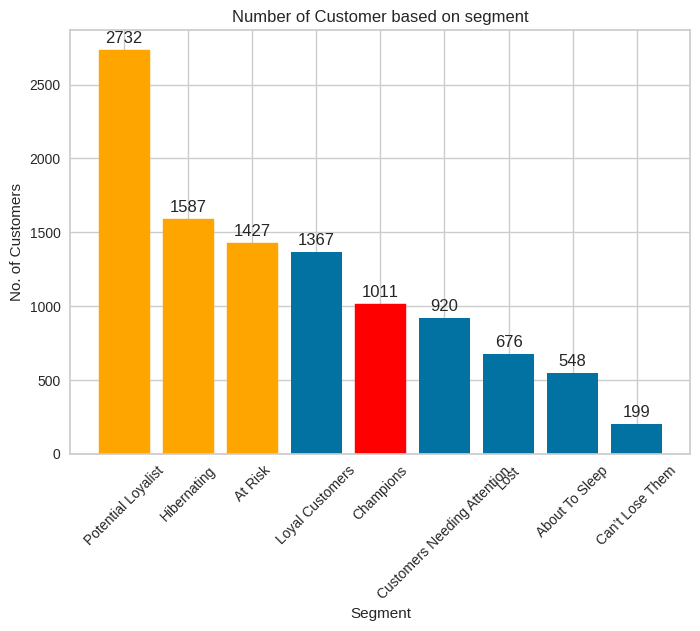

In [ ]:
# Count the occurrences of each segment
segment_counts = rfm_done['segment'].value_counts()

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(segment_counts.index, segment_counts.values)

# Highlight the top 3 segments with orange color
top_3_segments = segment_counts.index[:3]
for i, label in enumerate(segment_counts.index):
    if label in top_3_segments:
        bars[i].set_color('orange')
    if label == 'Champions':
        bars[i].set_color('red')

# Adding numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.title('Number of Customer based on segment')
plt.xlabel('Segment')
plt.ylabel('No. of Customers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Let's check the actionable recomendation based on biggest segment group
rfm_done['Actionable'].value_counts()

Offer membership / loyalty program, recommend other products.                                        2732
Offer other relevant products and special discounts. Recreate brand value.                           1587
Send personalized emails to reconnect, offer renewals, provide helpful resources.                    1427
Upsell higher value products. Ask for reviews. Engage them.                                          1367
Reward them. Can be early adopters for new products. Will promote your brand.                        1011
Make limited time offers, Recommend based on past purchases. Reactivate them.                         920
Revive interest with reach out campaign, ignore otherwise.                                            676
Share valuable resources, recommend popular products / renewals at discount, reconnect with them.     548
Win them back via renewals or newer products, don’t lose them to competition, talk to them.           199
Name: Actionable, dtype: int64

In [ ]:
rfm_done.groupby(['segment']).agg({
    'monetary' : ['mean','sum']
}).sort_values(by=[('monetary','mean'),('monetary','sum')], ascending=False)

monetary            
                                     mean         sum
segment                                              
Champions                    43358.199802  43835140.0
Loyal Customers              41878.061448  57247310.0
Can’t Lose Them              41771.507538   8312530.0
At Risk                      40585.360897  57915310.0
Customers Needing Attention  35652.380435  32800190.0
Hibernating                  21772.665406  34553220.0
Potential Loyalist           20787.346266  56791030.0
Lost                         17101.316568  11560490.0
About To Sleep               16838.795620   9227660.0

From descriptive stats, Champions has the highest avg monetary, but At risk Has the Highest total monetary value. Let's check with chart

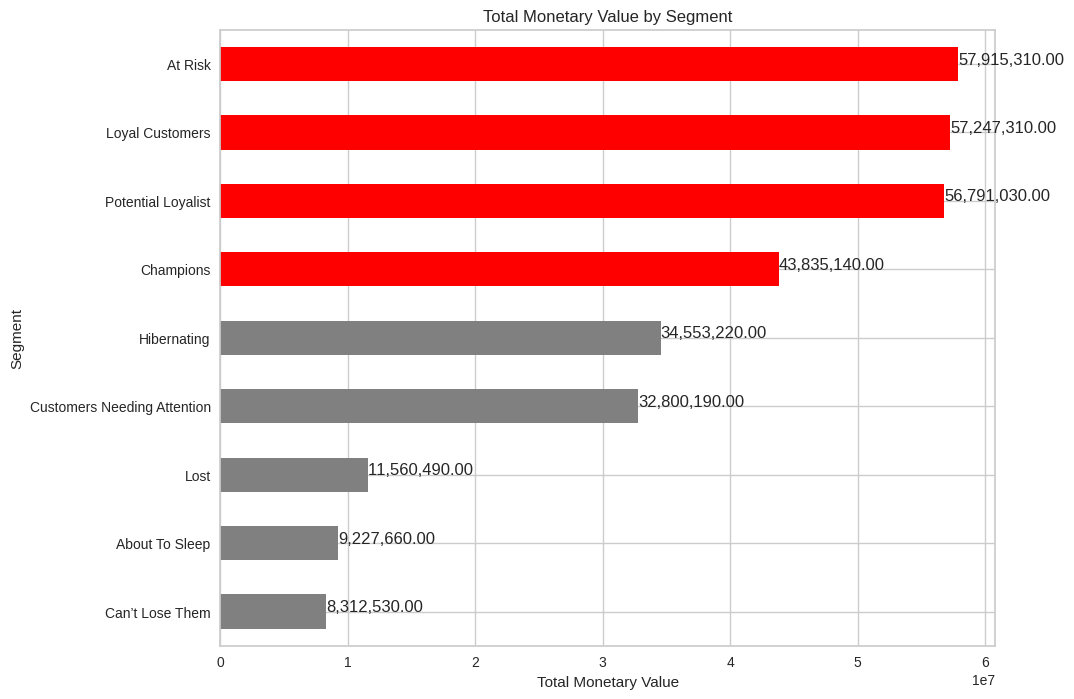

In [ ]:
# Group by segment for total monetary values and sort
segment_monetary_totals = rfm_done.groupby('segment')['monetary'].sum().sort_values(ascending=True)

# Create a horizontal bar chart
colors = ['red' if x in segment_monetary_totals.nlargest(4).index else 'grey' for x in segment_monetary_totals.index]
segment_monetary_totals.plot(kind='barh', figsize=(10, 8), color=colors)

# Show the values next to the bars with comma as thousand separator
for index, value in enumerate(segment_monetary_totals):
    plt.text(value, index, f'{value:,.2f}')

plt.xlabel('Total Monetary Value')
plt.ylabel('Segment')
plt.title('Total Monetary Value by Segment')
plt.show()

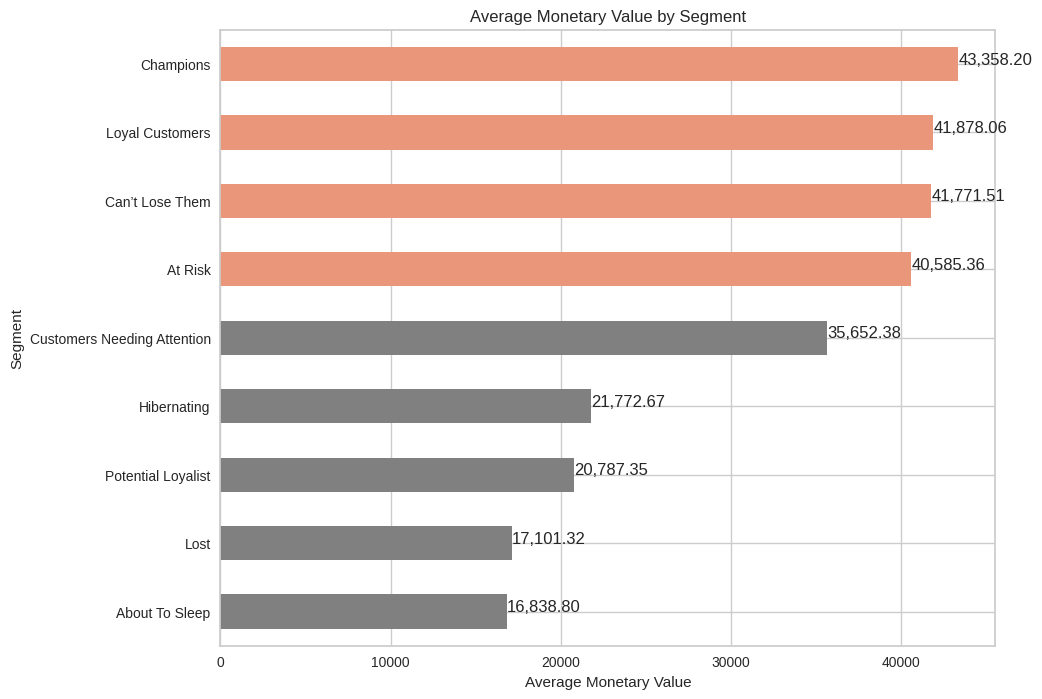

In [ ]:
# GROUP by segment for avg monetary values
segment_monetary_means = rfm_done.groupby('segment')['monetary'].mean().sort_values(ascending=True)

# Create a horizontal bar chart
colors = ['darksalmon' if x in segment_monetary_means.nlargest(4).index else 'grey' for x in segment_monetary_means.index]
segment_monetary_means.plot(kind='barh', figsize=(10, 8), color=colors)

# Show the values next to the bars with comma as thousand separator
for index, value in enumerate(segment_monetary_means):
    plt.text(value, index, f'{value:,.2f}')

plt.xlabel('Average Monetary Value')
plt.ylabel('Segment')
plt.title('Average Monetary Value by Segment')
plt.show()

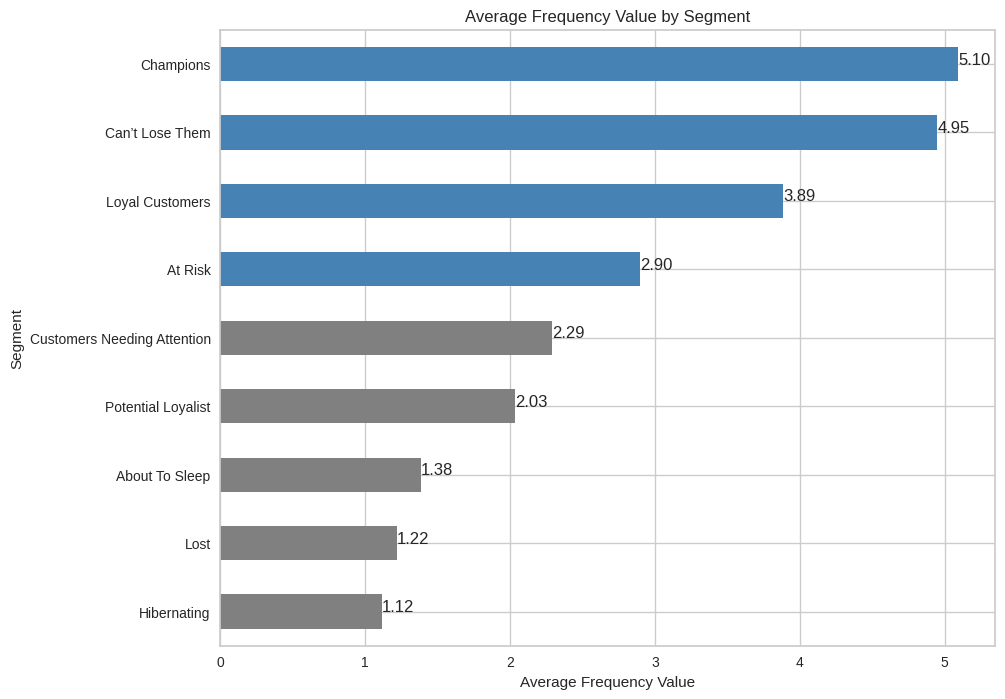

In [ ]:
#group by segment for avg frequency values
segment_freq_means = rfm_done.groupby('segment')['frequency'].mean().sort_values(ascending=True)

# Create a horizontal bar chart
colors = ['steelblue' if x in segment_freq_means.nlargest(4).index else 'grey' for x in segment_freq_means.index]
segment_freq_means.plot(kind='barh', figsize=(10, 8), color=colors)

# Show the values next to the bars with comma as thousand separator
for index, value in enumerate(segment_freq_means):
    plt.text(value, index, f'{value:,.2f}')

plt.xlabel('Average Frequency Value')
plt.ylabel('Segment')
plt.title('Average Frequency Value by Segment')
plt.show()

Insight:


1.   The "At Risk" and "Loyal Customers" segments have the highest total monetary value, indicating their significant contribution to overall revenue . However, the "At Risk" segment has a lower average monetary value compared to other high-value segments like "Champions" and "Loyal Customers", suggesting potential customer churn risks.

2.  The "Champions" segment has the highest average monetary value (Image 2) and average frequency value (Image 3), indicating a strong and engaged customer base that generates substantial revenue.

3.  "Can't Lose Them" Segment has a high average monetary value of 41,771 and the second-highest average frequency value (4.95), indicating highly engaged and valuable individual customers. Despite a relatively lower total monetary value 8.3 million, the bank should focus on retaining these customers as they are likely to be profitable and loyal if properly nurtured.



# Customer Segmentation - K-means

Identify the segments that have higher average sales per client, higher average transaction frequency per client, higher revenue generated, and/or a larger proportion of clients with no sales.


Re-read the business background, and identify business opportunities associated with the user persona in your result. (Hint: Look into your cluster result and consider this question: If we want to focus on one or two of your segments, which segments are more likely to give more profit for RevoBank?)

In [ ]:
kmeans = df_rfm[['MOB','client_age','avg_sales_L36M','cnt_sales_L36M','month_since_last_sales','count_direct_promo_L12M']]
kmeans

MOB  client_age  avg_sales_L36M  cnt_sales_L36M  \
0       91.0          26         25000.0               1   
1       69.0          51          9000.0               5   
5       45.0          51          9000.0               4   
6      105.0          48         10000.0               5   
7       41.0          49         25000.0               2   
...      ...         ...             ...             ...   
12482   21.0          52         15000.0               1   
12483   19.0          70         20000.0               1   
12484   21.0          41         20000.0               1   
12485   17.0          47         20000.0               2   
12486   21.0          47         20000.0               2   

       month_since_last_sales  count_direct_promo_L12M  
0                          26                        5  
1                          25                       10  
5                          18                        6  
6                          19                        6  
7                          24                        3  
...                       ...                      ...  
12482                      21                        3  
12483                      19                        4  
12484                      21                        4  
12485                      17                        6  
12486                      21                        5  

[10467 rows x 6 columns]

In [ ]:
kmeans.describe()

MOB    client_age  avg_sales_L36M  cnt_sales_L36M  \
count  10467.000000  10467.000000    10467.000000    10467.000000   
mean      62.177033     58.737365    14967.601032        2.540747   
std       41.537443     16.146511     6570.736230        1.798713   
min       15.000000     21.000000     3000.000000        1.000000   
25%       22.000000     46.000000    10000.000000        1.000000   
50%       51.000000     59.000000    15000.000000        2.000000   
75%      103.000000     73.000000    20000.000000        3.000000   
max      571.000000     88.000000    50000.000000       12.000000   

       month_since_last_sales  count_direct_promo_L12M  
count            10467.000000             10467.000000  
mean                18.676125                 5.099169  
std                  3.629061                 1.237861  
min                  3.000000                 0.000000  
25%                 16.000000                 4.000000  
50%                 18.000000                 5.000000  
75%                 21.000000                 6.000000  
max                 28.000000                14.000000

In [ ]:
kmeans[kmeans['avg_sales_L36M'] < 0].count()

MOB                        0
client_age                 0
avg_sales_L36M             0
cnt_sales_L36M             0
month_since_last_sales     0
count_direct_promo_L12M    0
dtype: int64

## Pairplot

In [ ]:
# Please consider that our dataframe has many rows
# Using pairplot with all data might take longer time
len(kmeans)

10467

In [ ]:
# So, we can take sample from the data to plot.
# This is only for plotting purpose, and not related to clustering process
# Let's say we take 10% of all data to plot, and round it so it will be integer
# sample_count = round(0.1*len(kmeans))

# We can do sampling in our dataset using .sample()
# For random state explanation, see Appendix
sampled_kmeans = kmeans.sample(frac=0.1, random_state=42)

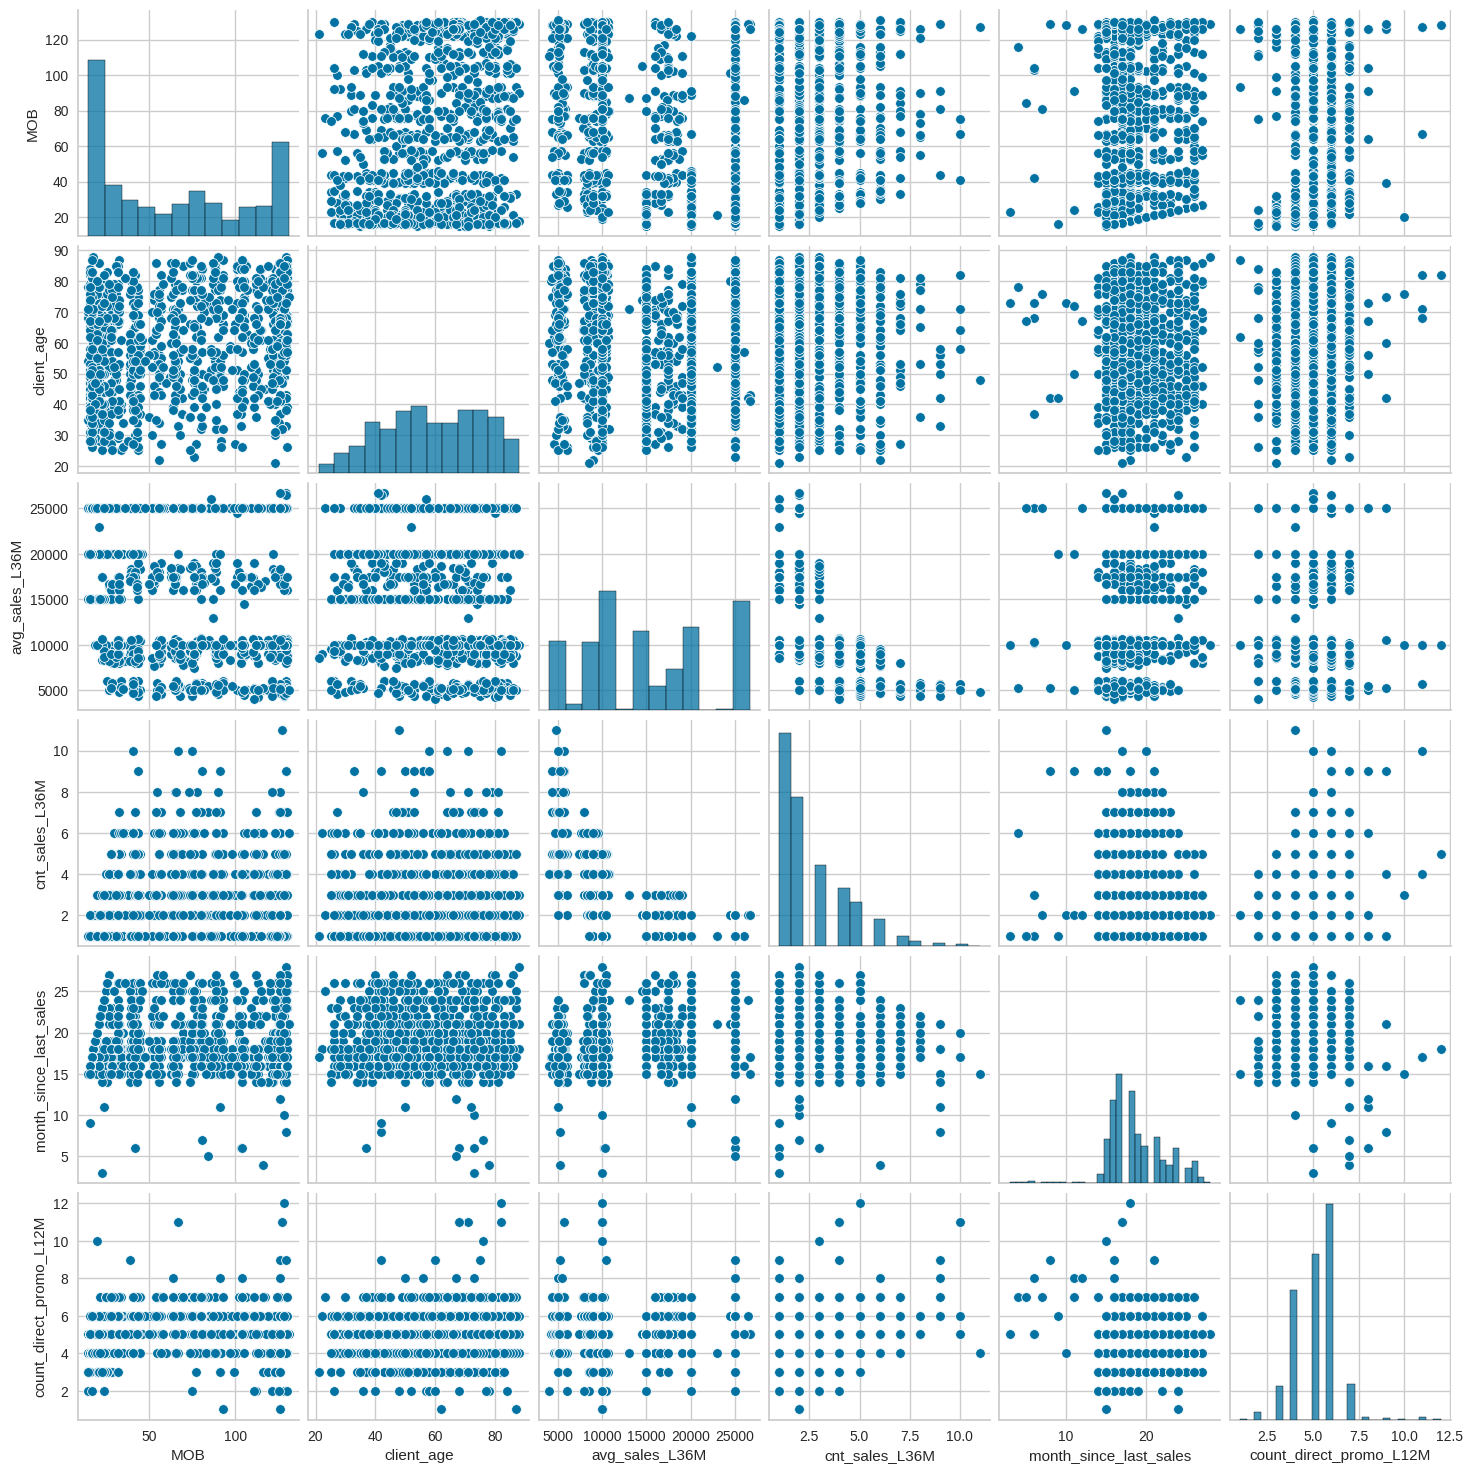

In [ ]:
sns.pairplot(sampled_kmeans)

## Feature Scaling

### Using StandardScaler

In [ ]:
# Do the same thing for StandardScaler()
ss = StandardScaler()
df_ss = pd.DataFrame(ss.fit_transform(kmeans), columns = kmeans.columns)
df_ss

MOB  client_age  avg_sales_L36M  cnt_sales_L36M  \
0      0.693936   -2.027616        1.526903       -0.856624   
1      0.164268   -0.479220       -0.908252        1.367294   
2     -0.413551   -0.479220       -0.908252        0.811315   
3      1.030998   -0.665028       -0.756055        1.367294   
4     -0.509854   -0.603092        1.526903       -0.300644   
...         ...         ...             ...             ...   
10462 -0.991371   -0.417284        0.004931       -0.856624   
10463 -1.039522    0.697561        0.765917       -0.856624   
10464 -0.991371   -1.098579        0.765917       -0.856624   
10465 -1.087674   -0.726964        0.765917       -0.300644   
10466 -0.991371   -0.726964        0.765917       -0.300644   

       month_since_last_sales  count_direct_promo_L12M  
0                    2.018215                -0.080117  
1                    1.742649                 3.959300  
2                   -0.186317                 0.727767  
3                    0.089249                 0.727767  
4                    1.467082                -1.695884  
...                       ...                      ...  
10462                0.640382                -1.695884  
10463                0.089249                -0.888000  
10464                0.640382                -0.888000  
10465               -0.461884                 0.727767  
10466                0.640382                -0.080117  

[10467 rows x 6 columns]

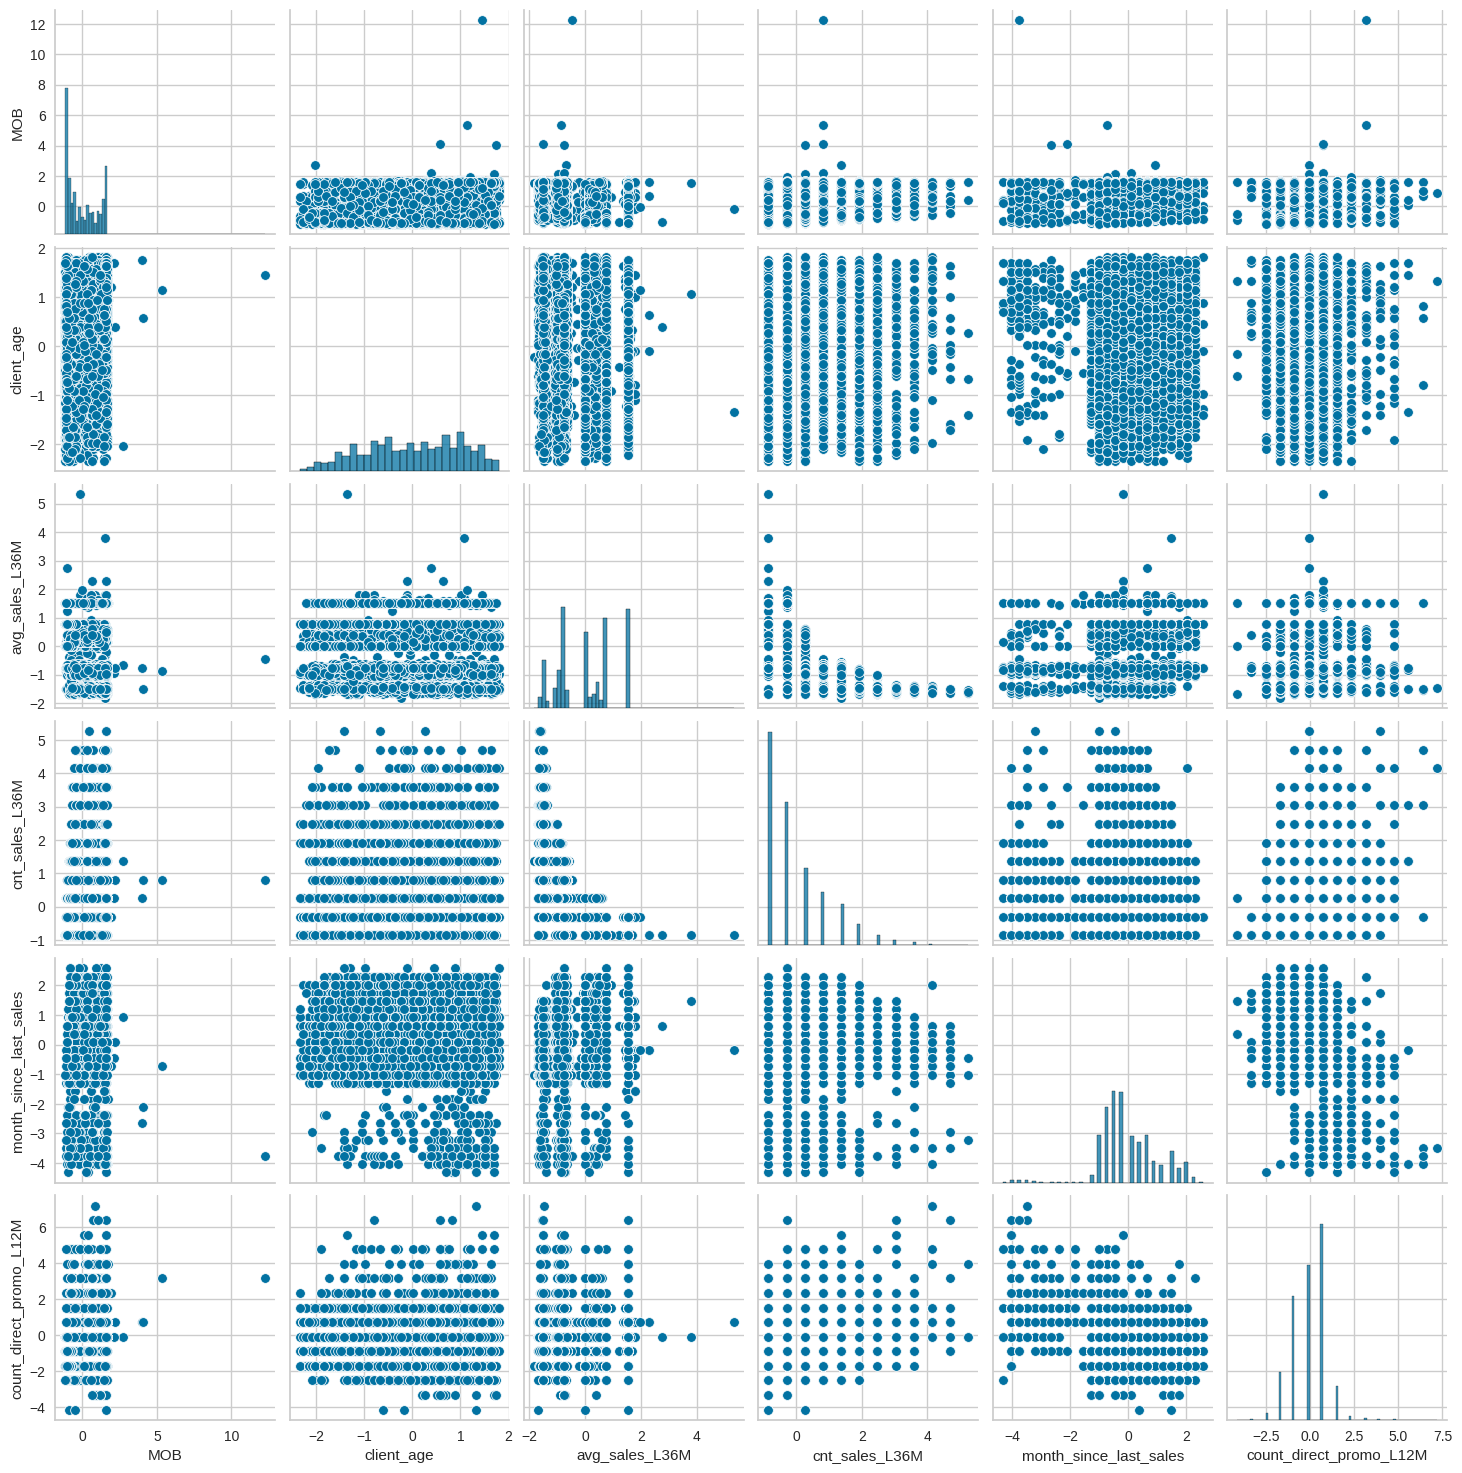

In [ ]:
sns.pairplot(df_ss)

In [ ]:
df_ss.describe()

MOB    client_age  avg_sales_L36M  cnt_sales_L36M  \
count  1.046700e+04  1.046700e+04    1.046700e+04    1.046700e+04   
mean  -6.516872e-17 -1.629218e-17    1.249067e-16    1.289798e-17   
std    1.000048e+00  1.000048e+00    1.000048e+00    1.000048e+00   
min   -1.135825e+00 -2.337295e+00   -1.821436e+00   -8.566239e-01   
25%   -9.672948e-01 -7.888994e-01   -7.560551e-01   -8.566239e-01   
50%   -2.690962e-01  1.626652e-02    4.931033e-03   -3.006444e-01   
75%    9.828462e-01  8.833683e-01    7.659171e-01    2.553352e-01   
max    1.225033e+01  1.812406e+00    5.331834e+00    5.259151e+00   

       month_since_last_sales  count_direct_promo_L12M  
count            1.046700e+04             1.046700e+04  
mean            -2.067070e-16             2.954655e-16  
std              1.000048e+00             1.000048e+00  
min             -4.319816e+00            -4.119534e+00  
25%             -7.374506e-01            -8.880003e-01  
50%             -1.863174e-01            -8.011684e-02  
75%              6.403823e-01             7.277666e-01  
max              2.569348e+00             7.190834e+00

In [ ]:
# Anyway, intermezzo, if you don't like Pandas showing e+XX notation (scientific notation),
# you can use the code below to prevent that

# Set option for float display, to show 4 numbers after decimal
pd.set_option('display.float_format','{:.4f}'.format)

In [ ]:
df_ss.describe()

MOB  client_age  avg_sales_L36M  cnt_sales_L36M  \
count 10467.0000  10467.0000      10467.0000      10467.0000   
mean     -0.0000     -0.0000          0.0000          0.0000   
std       1.0000      1.0000          1.0000          1.0000   
min      -1.1358     -2.3373         -1.8214         -0.8566   
25%      -0.9673     -0.7889         -0.7561         -0.8566   
50%      -0.2691      0.0163          0.0049         -0.3006   
75%       0.9828      0.8834          0.7659          0.2553   
max      12.2503      1.8124          5.3318          5.2592   

       month_since_last_sales  count_direct_promo_L12M  
count              10467.0000               10467.0000  
mean                  -0.0000                   0.0000  
std                    1.0000                   1.0000  
min                   -4.3198                  -4.1195  
25%                   -0.7375                  -0.8880  
50%                   -0.1863                  -0.0801  
75%                    0.6404                   0.7278  
max                    2.5693                   7.1908

## Determining K numbers


### Elbow

Determine K numbers with scaled dataframe

In [ ]:
# For each n_clusters between 1 and 11, we calculate the distortion value. So we use "for" iteration

# Create list kosong yang akan kita pakai untuk menampung distortion value tiap iterasi
distortions = []

K = range(1,15)
for n_clusters in K:
  # Buat modelnya
  kmeanModel = KMeans(n_clusters, random_state=1000, n_init='auto')
  # Train di model kita
  kmeanModel.fit(df_ss)
  # Ambil distortion value pakai ".inertia_" lalu diappend ke list kosong tadi
  distortions.append(kmeanModel.inertia_)

# Print output
distortions

[62802.00000000026,
 44545.72711202876,
 39100.85372644733,
 34632.36104799055,
 32289.097118414647,
 30476.482966192303,
 28489.612455781295,
 26280.741534387147,
 24956.504910172996,
 24083.64507706556,
 23060.32870358541,
 21214.915799311297,
 21534.687076770842,
 19799.382320698758]

<Figure size 1600x800 with 0 Axes>

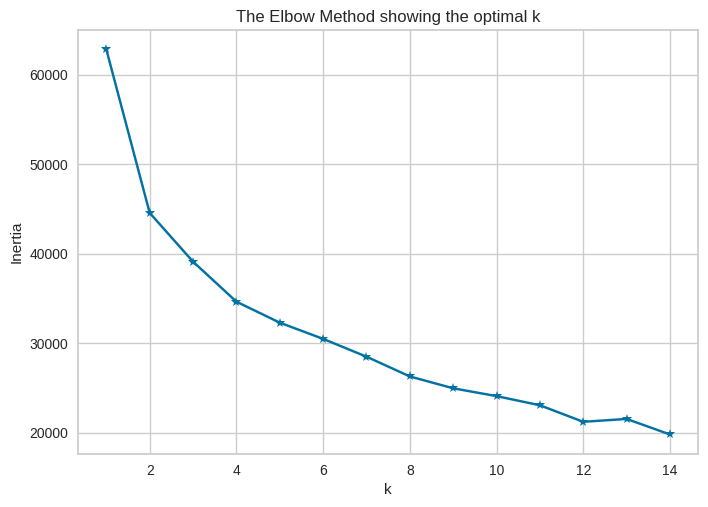

In [ ]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Sillhouette

For k=2, the average silhouette score is 0.27826164513548557
For k=3, the average silhouette score is 0.24218839892196115
For k=4, the average silhouette score is 0.20916376375827034
For k=5, the average silhouette score is 0.18145658391731653
For k=6, the average silhouette score is 0.17737608772576488
For k=7, the average silhouette score is 0.18501668786901637
For k=8, the average silhouette score is 0.19015416027360288
For k=9, the average silhouette score is 0.18667777437456062
For k=10, the average silhouette score is 0.18062681764741237


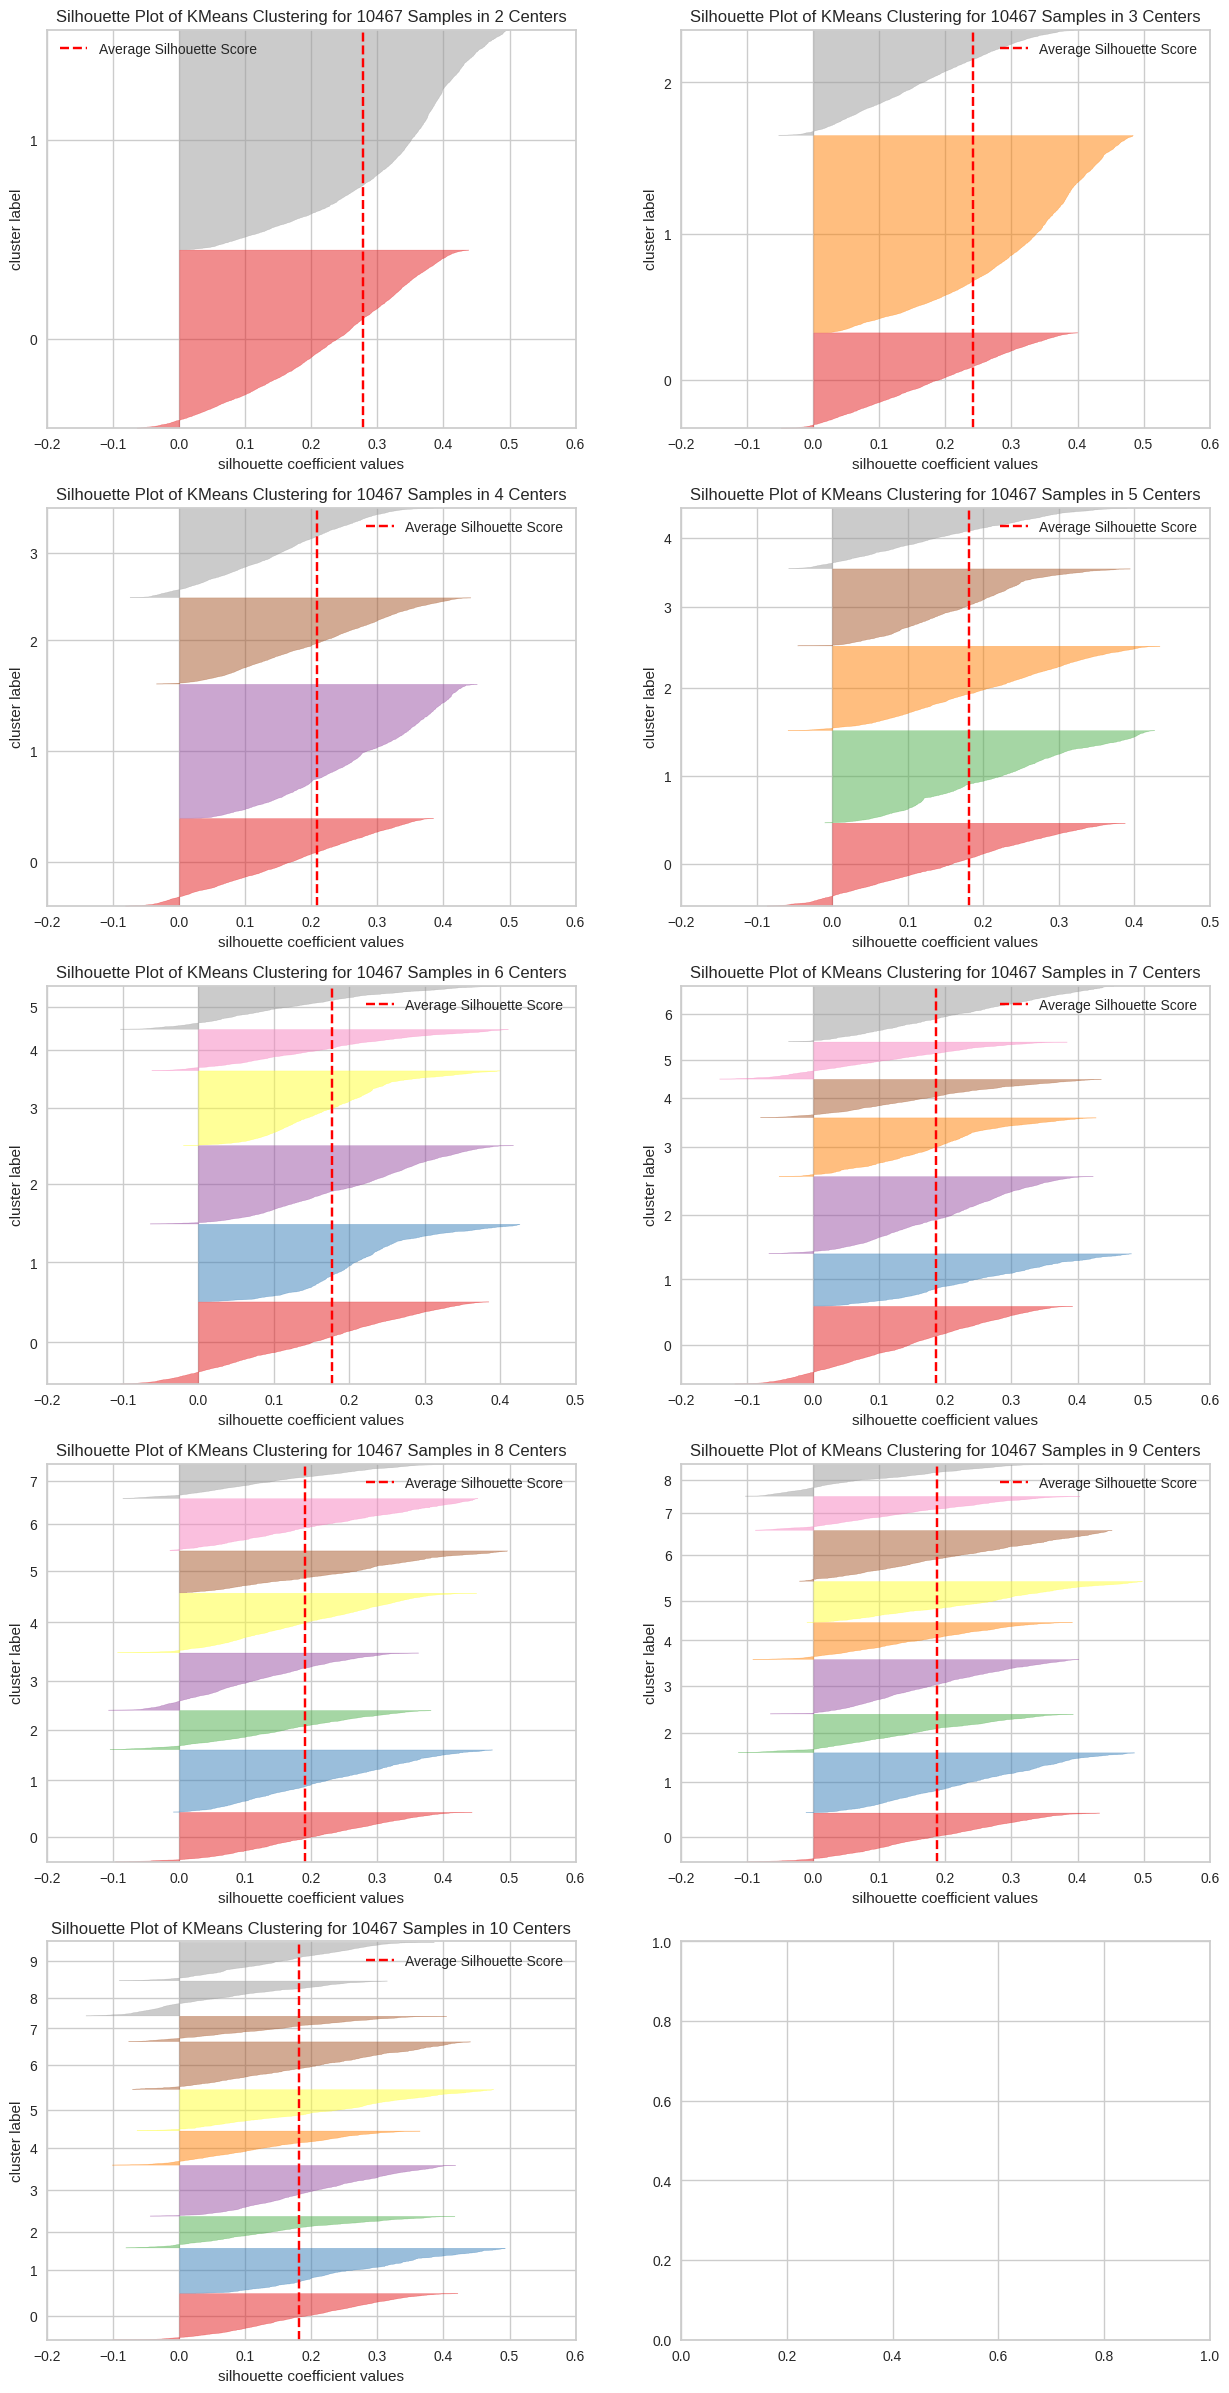

In [ ]:
K = range(2,11)

# Kita akan show tiap visualisasi lewat subplot dengan 2 kolom dan N baris
# N menyesuaikan berapa banyak K yang kita pilih. Misal K-nya 11 biji, kita bikin subplots 6x2
# Kalau K 12, maka bikin subplots tetep 6x2. Jadi rumusnya banyak K dibagi 2, lalu dibulatkan ke atas

# Jadi harus tau berapa banyak elemen K
banyak_K = len(K)
# Baru dibagi 2 dan dibulatkan ke atas pakai np.ceil() -- (jangan lupa ubah ke int)
n_baris = int(np.ceil(banyak_K/2))

# Define canvasnya
fig, axes = plt.subplots(n_baris, 2, figsize=(15,30))

# Karena kita akan show masing-masing plot di axes bersesuaian, kita harus tau indexnya
# Kita bisa pakai function enumerate() untuk ambil index dan elemen dari sequence tiap iterasi (see Appendix)
for i, n_clusters in enumerate(K):
  kmeanModel = KMeans(n_clusters, random_state=1000, n_init='auto')

  # Untuk memasukkan tiap chart ke index bersesuaian, kita mending .flatten()-kan dulu axesnya
  # Sehingga indexnya akan berupa bilangan terurut (liat appendix)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=axes.flatten()[i])
  sil.fit(df_ss)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

## Kmeans Initial

Decided to pick k=3 based on sillhoute method as average score is high and has least negative silhouette score

In [ ]:
df_ss2 = df_ss.copy()
df_ss2.head()

MOB  client_age  avg_sales_L36M  cnt_sales_L36M  month_since_last_sales  \
0  0.6939     -2.0276          1.5269         -0.8566                  2.0182   
1  0.1643     -0.4792         -0.9083          1.3673                  1.7426   
2 -0.4136     -0.4792         -0.9083          0.8113                 -0.1863   
3  1.0310     -0.6650         -0.7561          1.3673                  0.0892   
4 -0.5099     -0.6031          1.5269         -0.3006                  1.4671   

   count_direct_promo_L12M  
0                  -0.0801  
1                   3.9593  
2                   0.7278  
3                   0.7278  
4                  -1.6959

In [ ]:
cluster_model = KMeans(n_clusters=3, random_state=48, n_init='auto')
cluster_model.fit(df_ss2)

KMeans(n_clusters=3, n_init='auto', random_state=48)

In [ ]:
cluster_model.labels_

array([2, 1, 1, ..., 2, 0, 0], dtype=int32)

In [ ]:
# ambil label masukin di dataframe non scaled
kmeans2 = kmeans.copy()
kmeans2['cluster'] = cluster_model.labels_
kmeans2

MOB  client_age  avg_sales_L36M  cnt_sales_L36M  \
0      91.0000          26      25000.0000               1   
1      69.0000          51       9000.0000               5   
5      45.0000          51       9000.0000               4   
6     105.0000          48      10000.0000               5   
7      41.0000          49      25000.0000               2   
...        ...         ...             ...             ...   
12482  21.0000          52      15000.0000               1   
12483  19.0000          70      20000.0000               1   
12484  21.0000          41      20000.0000               1   
12485  17.0000          47      20000.0000               2   
12486  21.0000          47      20000.0000               2   

       month_since_last_sales  count_direct_promo_L12M  cluster  
0                          26                        5        2  
1                          25                       10        1  
5                          18                        6        1  
6                          19                        6        1  
7                          24                        3        2  
...                       ...                      ...      ...  
12482                      21                        3        2  
12483                      19                        4        0  
12484                      21                        4        2  
12485                      17                        6        0  
12486                      21                        5        0  

[10467 rows x 7 columns]

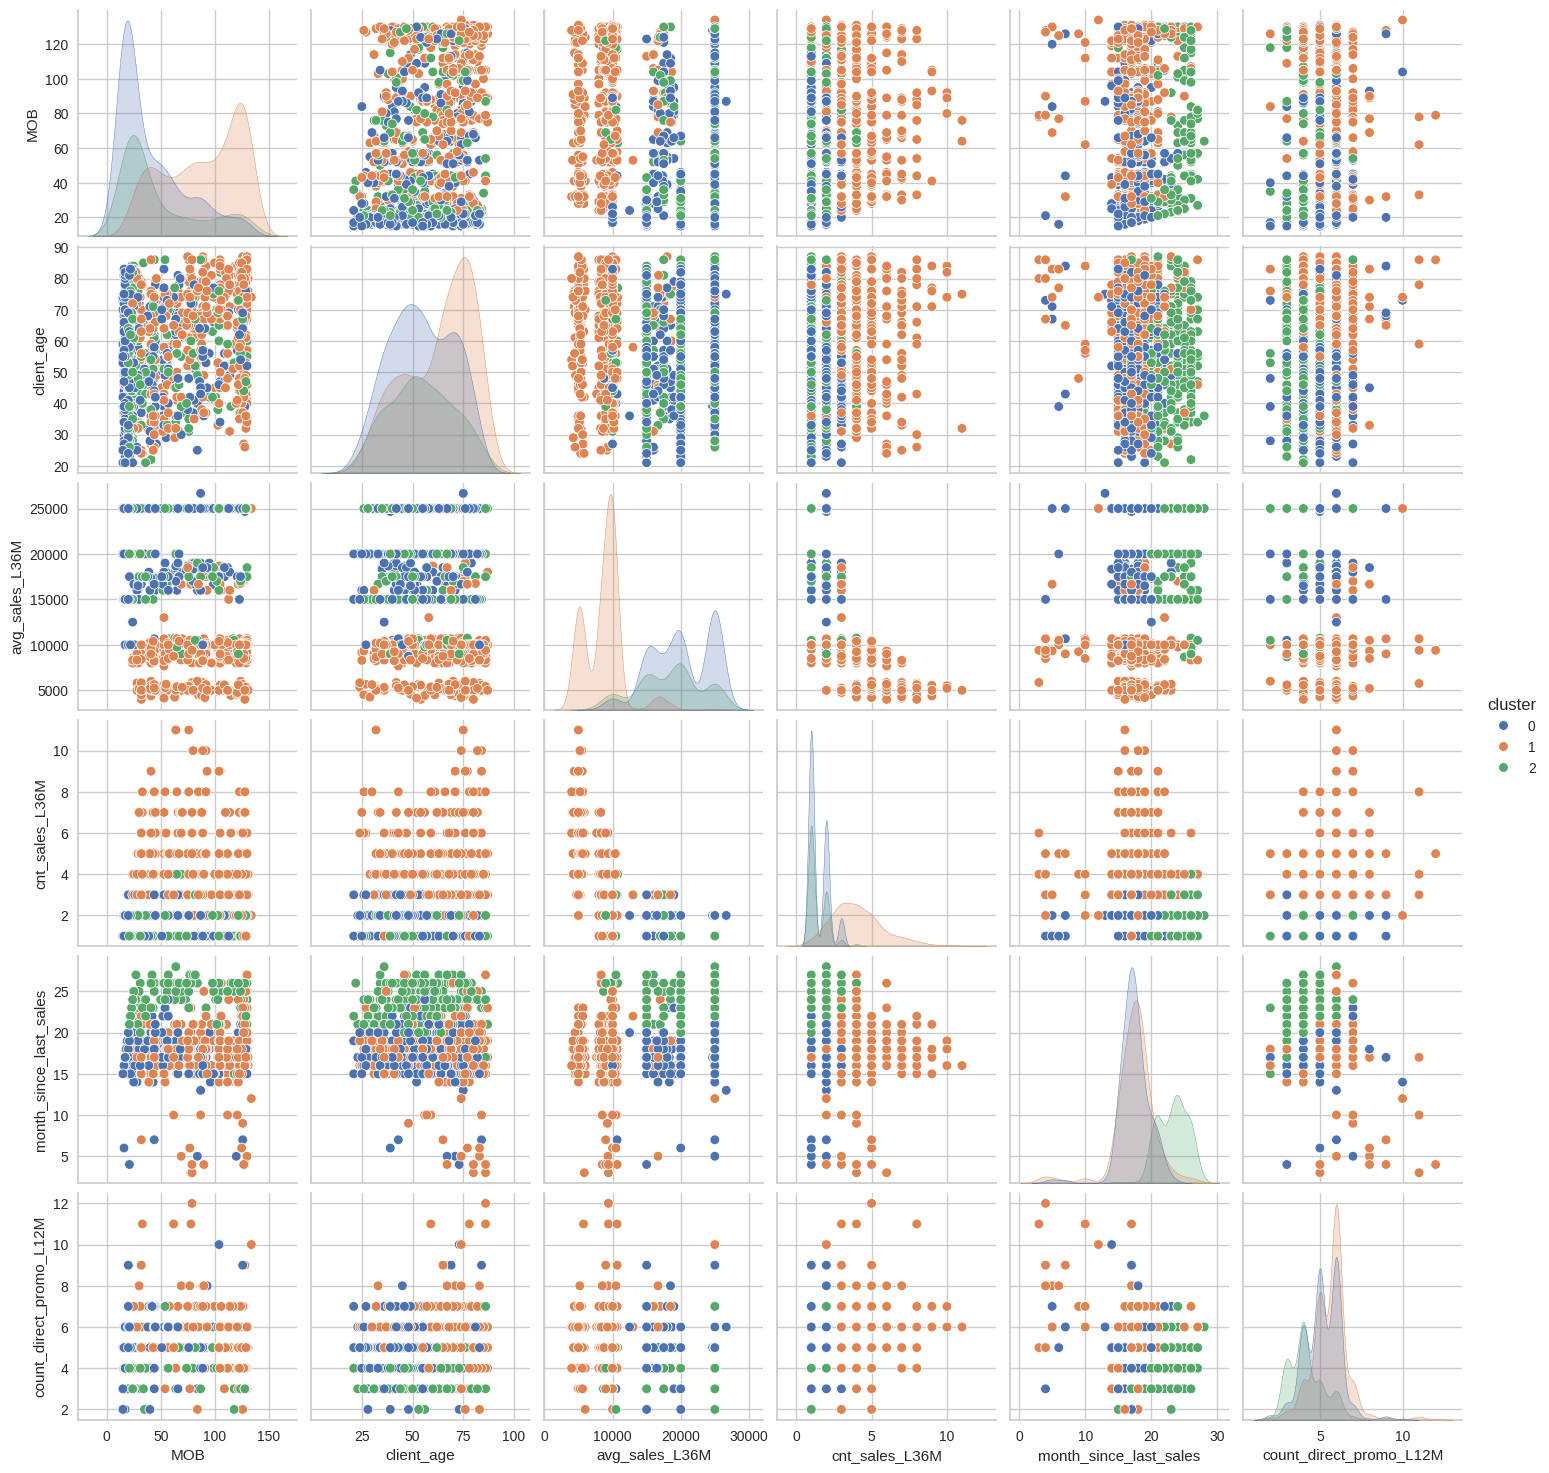

In [ ]:
# Jika kita ingin memilih palet warna lain, bisa pakai parameter "palette=" lalu pilih palet warnanya
# Pilihan palet warna: https://www.practicalpythonfordatascience.com/ap_seaborn_palette
sns.pairplot(kmeans2.sample(frac=0.1), hue='cluster', palette='deep')

### Interpret

In [ ]:
# Describe each groups of cluster
kmeans2.groupby('cluster').agg(['count','mean','median','min','max'])

MOB                                  client_age                      \
        count    mean  median     min      max      count    mean  median min   
cluster                                                                         
0        3943 40.0786 21.0000 15.0000 131.0000       3943 54.6870 53.0000  21   
1        4239 89.2814 93.0000 16.0000 571.0000       4239 63.9014 67.0000  21   
2        2285 50.0276 29.0000 17.0000 131.0000       2285 56.1466 56.0000  21   

             ... month_since_last_sales                          \
        max  ...                  count    mean  median min max   
cluster      ...                                                  
0        88  ...                   3943 17.4398 17.0000   3  24   
1        88  ...                   4239 17.3852 18.0000   3  27   
2        88  ...                   2285 23.2044 24.0000  14  28   

        count_direct_promo_L12M                        
                          count   mean median min max  
cluster                                                
0                          3943 5.0923 5.0000   2  11  
1                          4239 5.6320 6.0000   2  14  
2                          2285 4.1225 4.0000   0   9  

[3 rows x 30 columns]

Since the column is too long and showing unnecessary info, I decided to use only mean and median for information of cluster.

In [ ]:
# Describe each groups of cluster
kmeans2.groupby('cluster').agg({
    'MOB' : ['count','mean','median'],
    'client_age' : ['mean','median'],
    'avg_sales_L36M' : ['mean','median'],
    'cnt_sales_L36M' : ['mean','median'],
    'month_since_last_sales':['mean','median'],
    'count_direct_promo_L12M':['mean','median']
}).round(2)

MOB                 client_age         avg_sales_L36M             \
        count    mean  median       mean  median           mean     median   
cluster                                                                      
0        3943 40.0800 21.0000    54.6900 53.0000     19848.7800 20000.0000   
1        4239 89.2800 93.0000    63.9000 67.0000      8705.6800  9000.0000   
2        2285 50.0300 29.0000    56.1500 56.0000     18161.3800 20000.0000   

        cnt_sales_L36M        month_since_last_sales          \
                  mean median                   mean  median   
cluster                                                        
0               1.5000 1.0000                17.4400 17.0000   
1               4.1100 4.0000                17.3900 18.0000   
2               1.4200 1.0000                23.2000 24.0000   

        count_direct_promo_L12M         
                           mean median  
cluster                                 
0                        5.0900 5.0000  
1                        5.6300 6.0000  
2                        4.1200 4.0000

Based on the statistics, looks like I have enough information for clustering. Let's see the distribution on boxplot below.


### draft insight
Sales:
---
2 0 hi, 1 low
<br>

cnt:
---
1 hi, 0 2 low
<br>

month (recency, low is better):
---
0 1 low recency, 2 hi
<br>

MOB:
---
0 low, 1 hi, 2 med
<br>

age:
---
0 least old, 2 med old, 1 most old
<br>

promo:
---
2 low promo, 1 hi promo, 0 med promo

In [ ]:
# setting index to cluster in order to exclude cluster from box_plot
kmeans_box = kmeans2.set_index('cluster')
kmeans_box

MOB  client_age  avg_sales_L36M  cnt_sales_L36M  \
cluster                                                        
2        91.0000          26      25000.0000               1   
1        69.0000          51       9000.0000               5   
1        45.0000          51       9000.0000               4   
1       105.0000          48      10000.0000               5   
2        41.0000          49      25000.0000               2   
...          ...         ...             ...             ...   
2        21.0000          52      15000.0000               1   
0        19.0000          70      20000.0000               1   
2        21.0000          41      20000.0000               1   
0        17.0000          47      20000.0000               2   
0        21.0000          47      20000.0000               2   

         month_since_last_sales  count_direct_promo_L12M  
cluster                                                   
2                            26                        5  
1                            25                       10  
1                            18                        6  
1                            19                        6  
2                            24                        3  
...                         ...                      ...  
2                            21                        3  
0                            19                        4  
2                            21                        4  
0                            17                        6  
0                            21                        5  

[10467 rows x 6 columns]

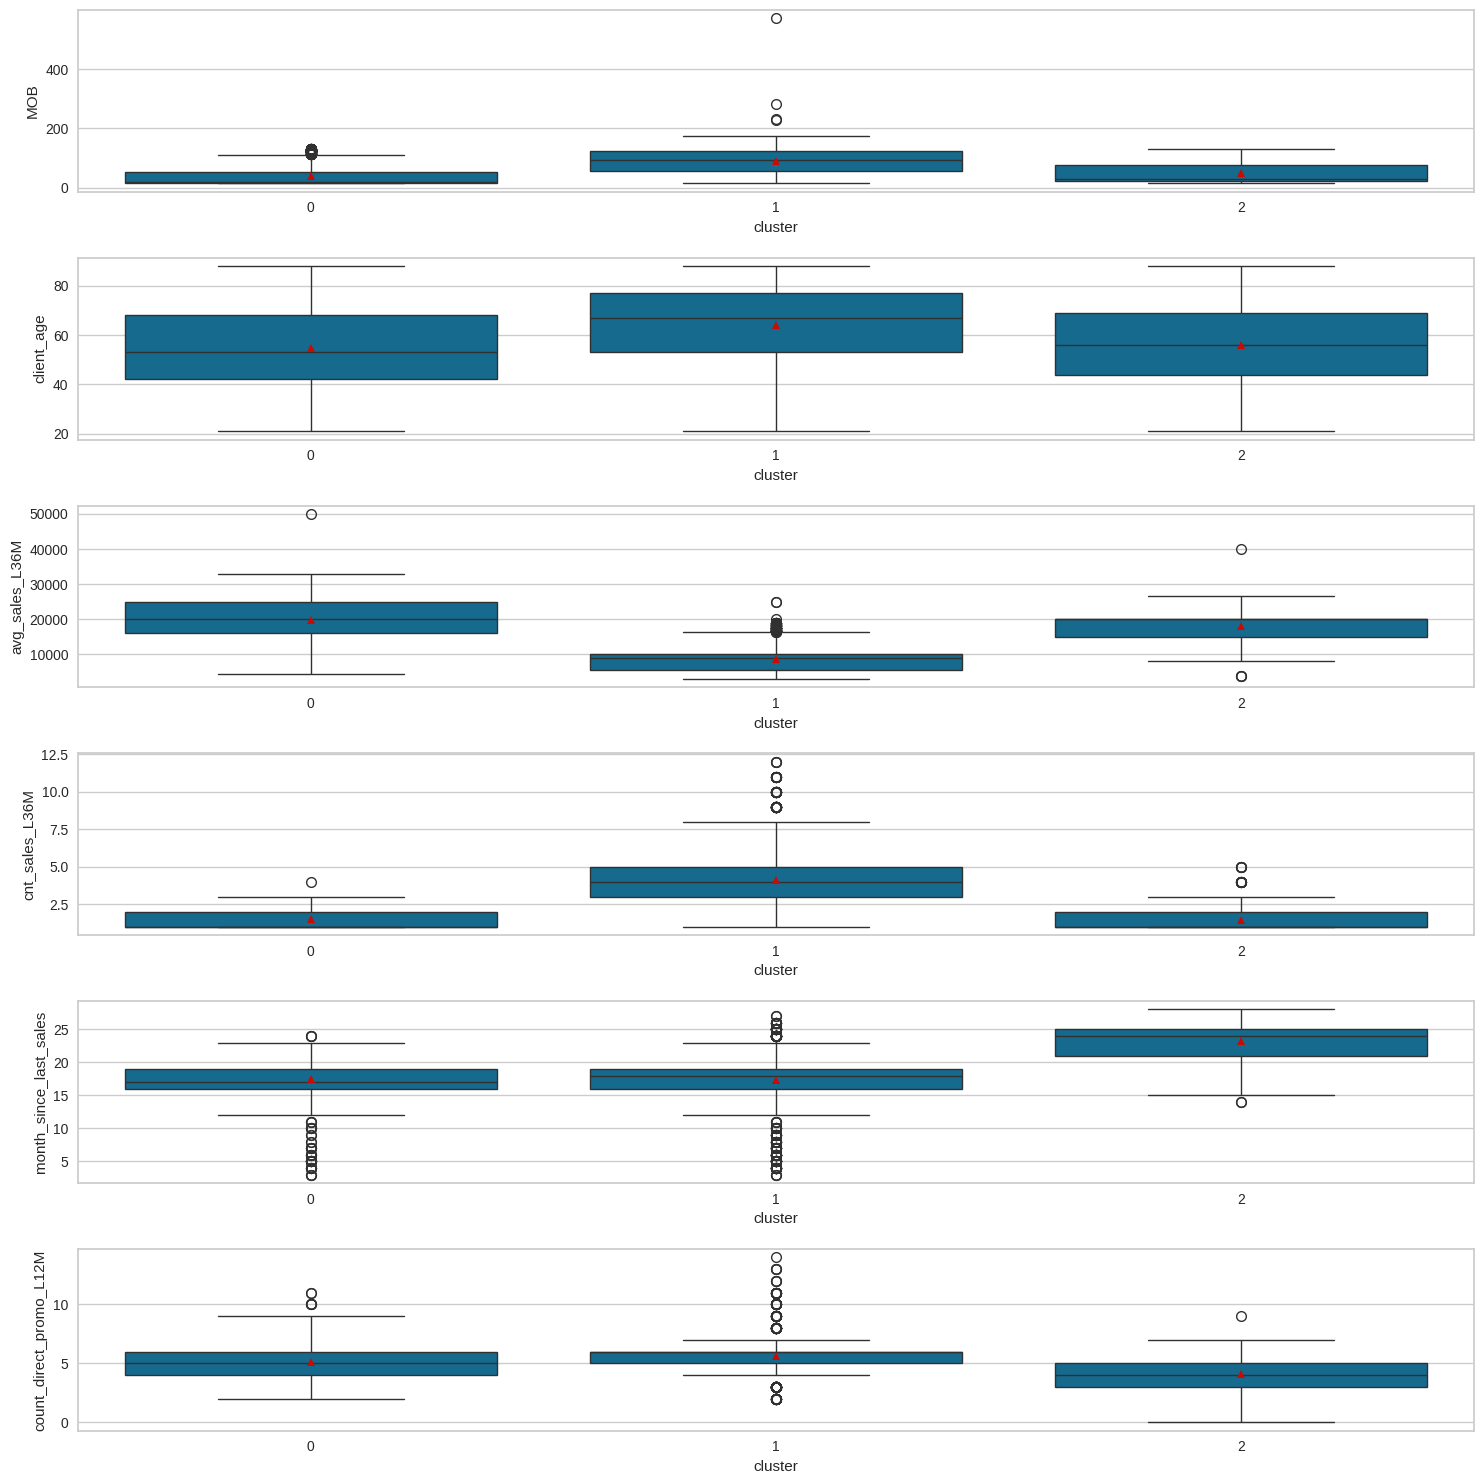

In [ ]:
# Bisa juga melakukan boxplot

# Ambil banyak kolom dari data kita
n_baris = len(kmeans_box.columns)

# Buat canvas subplot dengan 1 kolom dan N baris sebanyak kolom numerik
fig, axes = plt.subplots(n_baris, 1, figsize=(15,15))

for i, nama_kol in enumerate(kmeans_box.columns):
  # Show boxplot bisa pakai library Seaborn, pilih datanya, x-axis, y-axis, axes, dan showmeans kalo mau show meannya
  sns.boxplot(kmeans_box, x='cluster', y=nama_kol, ax=axes.flatten()[i], showmeans=True)

plt.tight_layout()
plt.show()

Let's make a donut chart to show the size of each cluster

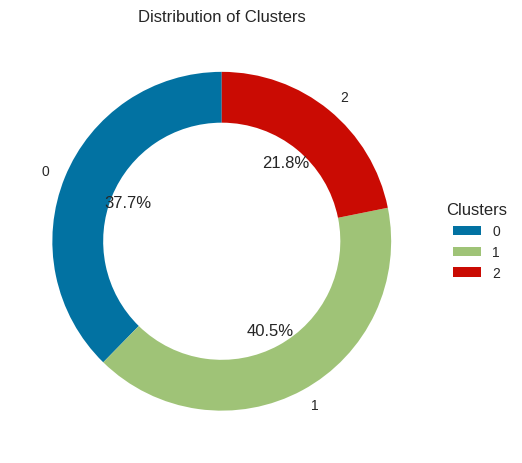

In [ ]:
# Group by cluster and count the number of rows in each cluster
cluster_counts = kmeans_box.groupby(kmeans_box.index).size()

# Create a donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax.set_title('Distribution of Clusters')

# Add a legend
ax.legend(wedges, cluster_counts.index, title="Clusters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

### Real Insight

---


Cluster 0:
---
Youngest age (client_age mean: 54.69), has received few promotions (promo mean: 5.09), relatively short tenure (MOB mean: 40:08), frequent user (mean: 17.44), high sales, yet has low number of transactions (avg_sales mean: 19,848.78; count_sales mean: 1.5).

<br>

Cluster 1:
---
Most populated cluster. Oldest age (client_age mean: 63.9), received plentiful promotions (promo mean: 5.63), longest tenure (MOB mean: 89.2), frequent user (mean: 17.39), low sales but high number of transacation (avg_sales mean: 8,705.68; count_sales mean: 4.11).  

<br>

Cluster 2:
---
Least populated cluster. Average age of 56.15, received few promotions (promo mean: 4.12), relatively medium tenure (MOB mean: 50.03), occasional user (mean: 23.2) , high sales yet low number of transactions (avg_sales mean: 18,161.38; count_sales mean: 1.42)


**Cluster 0: Sporadic Premium Patrons**

This cluster represents younger customers (average age 54.69 years) with a relatively short tenure (40.08 months on average). They have received fewer promotions (5.09 on average) but are frequent users (average 17.44 months since last sales). Despite having high average sales of $19,848.78, they have a low number of transactions (average 1.5).
* **Insight**: This cluster represents high-value customers who generate significant sales but have a relatively low number of transactions.
These customers are likely affluent individuals or businesses with large transaction sizes.
To retain and further engage these customers, the bank could offer personalized services, exclusive benefits, or tailored investment opportunities.

**Cluster 1: Loyal Mature Customers**

**This is the largest cluster**, consisting of older customers (average age 63.9 years) with the longest tenure (89.2 months on average). They have received the highest number of promotions (5.63 on average) and are frequent users (average 17.39 months since last sales). However, their average sales amount is lower at $8,705.68, but they have a high number of transactions (4.11 on average).
* **Insight**: Despite lower average sales, their high transaction frequency suggests a strong loyalty to the bank.
The bank should focus on cultivating long-term relationships with these customers by providing exceptional customer service and loyalty programs.
Targeted promotions or cross-selling opportunities for products aligning with their life stage (e.g., retirement planning, wealth management) could be explored.

**Cluster 2: High-Potential Occasional Buyers**

**This is the smallest cluster**, with customers having an average age of 56.15 years and a medium tenure of 50.03 months. They have received the fewest promotions (4.12 on average) and are occasional users (average 23.2 months since last sales). However, their average sales amount of $18,161.38 is high, but they have a low number of transactions (1.42 on average).
* **Insight**: This cluster represents customers with high sales potential but relatively infrequent transactions.
These customers may be business owners, professionals, or high-income individuals with significant disposable income.
The bank could investigate reasons for their occasional usage and implement strategies to increase their engagement, such as tailored marketing campaigns, improved product offerings, or personalized financial advisory services.